## Project Supply Chain -- Data Exploration

Possible Questions for the Project:

Are customers happier with digital products than with physical ones?

Are customers willing to switch to digital products from physical ones when they had a positive/negative experience

**Exploration of metadata (without Text Mining technics)**
Some ideas (from Maelys):

- Response rate, influence of brand or source, verified_purchase or not

- Distribution of scores.

- Influence of the marketplace or the company on the distribution of notes (hypothesis testin could be used for  this kind of analysis )

- Information about the 10 most active users, with a small analysis on it (distribution of scores, response rate, company...).

**Goal 2 Analysis of text (and cleaning if necessary ). You will need to complete the text mining module to be able to do this part.**
Some ideas :
- Analyze the punctuation according to the note

- Analyze the length of the text (nb character, nb words...) according to the note.

- Analyze the frequency of email addresses, links, phone numbers...

- Occurrence of words, wordcloud...

- N-gram

- Occurrence of some words : delivery order, return order, delivery, SAV, customer service...

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm # color map
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('stopwords')
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import os
project_path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir, os.path.pardir)).replace('\\', '/')
project_path

'D:/Ling/Study/AZ_DATASCIENCE_ACADEMY/project_supply_chain'

In [4]:
data_hc = pd.read_csv(project_path + '/data/amazon_reviews_us_Video_Games_v1_00.tsv', sep="\t", error_bad_lines=False)
data_dc = pd.read_csv(project_path + '/data/amazon_reviews_us_Digital_Video_Games_v1_00.tsv', sep="\t", error_bad_lines=False)
data_raw = pd.concat([data_hc,data_dc], axis = 0)

C:\Users\Ling\AppData\Local\Temp\ipykernel_7640\2351948173.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_hc = pd.read_csv(project_path + '/data/amazon_reviews_us_Video_Games_v1_00.tsv', sep="\t", error_bad_lines=False)
b'Skipping line 20630: expected 15 fields, saw 22\nSkipping line 28172: expected 15 fields, saw 22\nSkipping line 54791: expected 15 fields, saw 22\n'
b'Skipping line 75419: expected 15 fields, saw 22\nSkipping line 104832: expected 15 fields, saw 22\n'
b'Skipping line 138464: expected 15 fields, saw 22\nSkipping line 194849: expected 15 fields, saw 22\n'
b'Skipping line 201568: expected 15 fields, saw 22\nSkipping line 242567: expected 15 fields, saw 22\n'
b'Skipping line 493585: expected 15 fields, saw 22\nSkipping line 502478: expected 15 fields, saw 22\n'
b'Skipping line 660750: expected 15 fields, saw 22\n'
C:\Users\Ling\AppData\Local\Temp\ipykernel_7640\2351948

### Data Cleansing

In [5]:
data_raw.shape

(1924992, 15)

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924992 entries, 0 to 144723
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 235.0+ MB


In [8]:
data_raw.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     12039526   RTIS3L2M1F5SM  B001CXYMFS       737716809   
1          US      9636577   R1ZV7R40OLHKD  B00M920ND6       569686175   
2          US      2331478  R3BH071QLH8QMC  B0029CSOD2        98937668   
3          US     52495923  R127K9NTSXA2YH  B00GOOSV98        23143350   
4          US     14533949  R32ZWUXDJPW27Q  B00Y074JOM       821342511   

                                       product_title product_category  \
0         Thrustmaster T-Flight Hotas X Flight Stick      Video Games   
1  Tonsee 6 buttons Wireless Optical Silent Gamin...      Video Games   
2  Hidden Mysteries: Titanic Secrets of the Fatef...      Video Games   
3  GelTabz Performance Thumb Grips - PlayStation ...      Video Games   
4  Zero Suit Samus amiibo - Japan Import (Super S...      Video Games   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            1              0            1    N                 Y   
3            3              0            0    N                 Y   
4            4              0            0    N                 Y   

                                     review_headline  \
0  an amazing joystick. I especially love that yo...   
1  Definitely a silent mouse... Not a single clic...   
2                                           One Star   
3                          good, but could be bettee   
4                                  Great but flawed.   

                                         review_body review_date  
0  Used this for Elite Dangerous on my mac, an am...  2015-08-31  
1  Loved it,  I didn't even realise it was a gami...  2015-08-31  
2     poor quality work and not as it is advertised.  2015-08-31  
3  nice, but tend to slip away from stick in inte...  2015-08-31  
4  Great amiibo, great for collecting. Quality ma...  2015-08-31

In [9]:
# check null data
print(data_raw.isnull().sum(axis = 0))

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           0
helpful_votes         0
total_votes           0
vine                  0
verified_purchase     0
review_headline      30
review_body          61
review_date          30
dtype: int64


In [10]:
# drop missing data, since the amount of missing data is very low
data = data_raw.dropna(axis = 0)

#### check data quality and clean data

In [11]:
# check duplicates
print(data["marketplace"].value_counts()) #Only data from us marketplace, so we can drop the row
print("number of duplicated customer ids = ", len(data[data['customer_id'].duplicated() == True])) #most likely because customers ordered multiple items
print("number of duplicated review ids = ", len(data[data['review_id'].duplicated() == True])) 
#has to be 0 in order to ensure the ID is unique, i think we can drop this row as well in this case
#placeholder for code that shows if product_id, product_title and product_parent are fully correlated
print("product_category: ", data["product_category"].value_counts())
print("star rating: ", data["star_rating"].value_counts())
print("vines: ",data["vine"].value_counts())
print("verified_purchases: ",data["verified_purchase"].value_counts())

US    1924871
Name: marketplace, dtype: int64
number of duplicated customer ids =  798982
number of duplicated review ids =  0
product_category:  Video Games            1780154
Digital_Video_Games     144717
Name: product_category, dtype: int64
star rating:  5    1103331
4     337771
1     216459
3     165032
2     102278
Name: star_rating, dtype: int64
vines:  N    1920587
Y       4284
Name: vine, dtype: int64
verified_purchases:  Y    1288358
N     636513
Name: verified_purchase, dtype: int64


In [12]:
# check corr
round(data.corr(),2)

customer_id  product_parent  star_rating  helpful_votes  \
customer_id            1.00            0.01        -0.05           0.05   
product_parent         0.01            1.00         0.01          -0.00   
star_rating           -0.05            0.01         1.00          -0.05   
helpful_votes          0.05           -0.00        -0.05           1.00   
total_votes            0.05           -0.00        -0.11           0.95   

                total_votes  
customer_id            0.05  
product_parent        -0.00  
star_rating           -0.11  
helpful_votes          0.95  
total_votes            1.00

In [13]:
# drop the rows we do not need for this analysis or our model
to_drop = ["marketplace"] # "review_id", "product_id", "product_parent"
data = data.drop(to_drop, axis=1)

### First exploration

#### reviews per product

In [ ]:
reviews_per_product = data.groupby(["product_id"])["review_id"].nunique().sort_values().reset_index().rename({"review_id":"num_of_reviews"}, axis=1)

reviews_per_product.tail(1000).plot()   

In [ ]:
reviews_per_product["num_of_reviews"].quantile([0.01,0.1,0.25, 0.5,0.75,0.9,0.99])

#### countplot of various data

In [ ]:
sns.countplot(x=data["product_category"])

In [ ]:
sns.countplot(x=data["star_rating"])

In [ ]:
sns.countplot(x=data["verified_purchase"])
#there are a lot of non-verified purchases 
#let's look at how the rating distribution of these reviews looks like compared to the verified ones

In [ ]:
data.groupby('verified_purchase').size()

In [ ]:
# alternative pie chat of verified and non-verified purchase
def label_function(val):
    return f'{val / 100 * len(data):,.0f}\n{val:.2f}%'

figsize = (10, 5)

data.groupby('verified_purchase').size().plot(kind='pie', 
                                              autopct=label_function, 
                                              textprops={'fontsize': 10},
                                              cmap = cm.get_cmap('Pastel1'))

plt.ylabel('', fontsize=10)

plt.show()

In [ ]:
sns.countplot(x=data[data["verified_purchase"]=="Y"]["star_rating"])

In [ ]:
# alternative pie chat of verified and non-verified purchase
def label_function(val):
    return f'{val / 100 * len(data):,.0f}\n{val:.2f}%'

figsize = (10, 5)

data[data["verified_purchase"]=="Y"].groupby('star_rating').size().plot(kind='pie', 
                                              autopct=label_function, 
                                              textprops={'fontsize': 8},
                                              cmap = cm.get_cmap('Pastel1'))

plt.ylabel('', fontsize=10)

plt.show()

In [ ]:
# alternative pie chat of verified and non-verified purchase
def label_function(val):
    return f'{val / 100 * len(data):,.0f}\n{val:.2f}%'

figsize = (10, 5)

data[data["verified_purchase"]=="N"].groupby('star_rating').size().plot(kind='pie', 
                                              autopct=label_function, 
                                              textprops={'fontsize': 8},
                                              cmap = cm.get_cmap('Pastel1'))

plt.ylabel('', fontsize=10)

plt.show()

In [ ]:
sns.countplot(x=data[data["verified_purchase"]=="N"]["star_rating"])
#there are a lot more lower ratings in comparison. 
#It is possible that customers were so unhappy, that they created a 2nd account just to review the game negatively again

In [ ]:
#there are definitely more hard-copy sales than digital sales, let's look at the ratings from the reviews for each one
sns.countplot(x=data[data["product_category"]=="Video Games"]["star_rating"])

In [ ]:
sns.countplot(x=data[data["product_category"]=="Digital_Video_Games"]["star_rating"])
#we can see from this simple analysis, that there are a lot more 1-star reviews for digital products

#### rating problems

In [ ]:
data["rating_problems"] = data["star_rating"].apply(lambda x: False if x in [1,2,3,4,5,"1", "2", "3", "4", "5" ] else True) 
data["star_rating"].value_counts(normalize=1)
data["rating_problems"].value_counts(normalize=1)

In [ ]:
data = data[data["rating_problems"] != True]
data["star_rating"] = data["star_rating"].astype("int")
sns.countplot(x=data["star_rating"]) # Data is very imbalanced across classes

#### reviews over time

In [ ]:
reviews_over_time = data.groupby("review_date").agg({"review_id":"count"}).plot(kind="line")

In [ ]:
num_rev_prod_per_rating = data.groupby("star_rating").agg({"review_id":lambda x: x.nunique(), "product_id": lambda x: x.nunique()} )
num_rev_prod_per_rating["rev_per_prod"] = num_rev_prod_per_rating.apply(lambda x: x["review_id"] / x["product_id"], axis=1)
num_rev_prod_per_rating["rev_per_prod"].plot(kind="bar", title="Reviews per product")

In [ ]:
data.groupby(["star_rating", "verified_purchase"])["review_id"].count().plot(kind="bar")

#### 10 most rated titles

In [ ]:
data["product_title"].value_counts().head(10).plot(kind="barh")

#### Top 10 titles where the reviews recieved the most votes

In [ ]:
data[["product_title", "total_votes"]].nlargest(10, ["total_votes"]).plot(x="product_title", y="total_votes", kind="barh")

#### Top 10 titles have the most 5-star reviews

In [ ]:
data[data["star_rating"] == 5]["product_title"].value_counts().head(10).plot(kind="barh")

#### Top 10 titles with the lowest rated reviews

In [ ]:
data[data["star_rating"] == 1]["product_title"].value_counts().head(10).plot(kind="barh")
#that's where SimCity went, reviewers did not like this game at all

#### Top 10 games with the most helpful reviews

In [ ]:
data[["product_title", "helpful_votes"]].nlargest(10, ["helpful_votes"]).plot(x="product_title", y="helpful_votes", kind="barh")
#Customers found reviews of SimCity the most helpful allthough the game also had a lot of bad reviews. this again shows that this title was highly controversial

### tokenization and stemming of review_body

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()


stop_words.update(["car", "work", "product", "install"])

def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string 
    for word in word_tokenize(text):
        if word.lower() not in stop_words:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha(): # filter out non alphabet words like emoji
            filtered_tokens.append(token)
            
    # stemming
    # Removes ing also in anything ...
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return_string = " ".join(stems)
    
    return return_string

In [ ]:
df_review_body = data.dropna(subset=['review_body'])

In [ ]:
df_review_body["processed_reviews"] = df_review_body["review_body"].apply(lambda x: tokenization_and_stemming(x))

In [ ]:
df_review_body.head()

### word cloud of processed_reviews

In [ ]:
df_processed_reviews = data.dropna(subset="processed_reviews")
processed_review_string = df_processed_reviews.groupby("star_rating").aggregate({"processed_reviews":lambda x: " \n ".join(x)})

In [ ]:
def wc_for_rating(rating):
    wordcloud = WordCloud(collocations=True).generate(processed_review_string.loc[rating][0][1:5000000].replace("one", "").replace("use", "").replace(" br ", " ").replace("car", "").replace("work", ""))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
wc_for_rating(1)
wc_for_rating(2)
wc_for_rating(3)
wc_for_rating(4)
wc_for_rating(5)

## --- From here new 2023/01/12  ---

### 2nd Data Exploration

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# check corr
round(data.corr(),2)

customer_id  product_parent  star_rating  helpful_votes  \
customer_id            1.00            0.01        -0.05           0.05   
product_parent         0.01            1.00         0.01          -0.00   
star_rating           -0.05            0.01         1.00          -0.05   
helpful_votes          0.05           -0.00        -0.05           1.00   
total_votes            0.05           -0.00        -0.11           0.95   

                total_votes  
customer_id            0.05  
product_parent        -0.00  
star_rating           -0.11  
helpful_votes          0.95  
total_votes            1.00

In [12]:
# drop the rows we do not need for this analysis or our model
to_drop = ["marketplace"] # "review_id", "product_id", "product_parent"
data = data.drop(to_drop, axis=1)

In [13]:
#converting to lower case
data['review_body'] = data['review_body'].astype(str).str.lower()
data['review_headline'] = data['review_headline'].astype(str).str.lower()
data.head()

customer_id       review_id  product_id  product_parent  \
0     12039526   RTIS3L2M1F5SM  B001CXYMFS       737716809   
1      9636577   R1ZV7R40OLHKD  B00M920ND6       569686175   
2      2331478  R3BH071QLH8QMC  B0029CSOD2        98937668   
3     52495923  R127K9NTSXA2YH  B00GOOSV98        23143350   
4     14533949  R32ZWUXDJPW27Q  B00Y074JOM       821342511   

                                       product_title product_category  \
0         Thrustmaster T-Flight Hotas X Flight Stick      Video Games   
1  Tonsee 6 buttons Wireless Optical Silent Gamin...      Video Games   
2  Hidden Mysteries: Titanic Secrets of the Fatef...      Video Games   
3  GelTabz Performance Thumb Grips - PlayStation ...      Video Games   
4  Zero Suit Samus amiibo - Japan Import (Super S...      Video Games   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            1              0            1    N                 Y   
3            3              0            0    N                 Y   
4            4              0            0    N                 Y   

                                     review_headline  \
0  an amazing joystick. i especially love that yo...   
1  definitely a silent mouse... not a single clic...   
2                                           one star   
3                          good, but could be bettee   
4                                  great but flawed.   

                                         review_body review_date  
0  used this for elite dangerous on my mac, an am...  2015-08-31  
1  loved it,  i didn't even realise it was a gami...  2015-08-31  
2     poor quality work and not as it is advertised.  2015-08-31  
3  nice, but tend to slip away from stick in inte...  2015-08-31  
4  great amiibo, great for collecting. quality ma...  2015-08-31

In [16]:
#removing punctuation and converting to lower case
import re
import string

def text_clean1(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    return text

cleaned1 = lambda x: text_clean1(x)

#sample data to test code
data_subsample = data.iloc[0:100]

# using function on columns
data_subsample['cleaned_reviewheadline'] = data_subsample['review_headline'].apply(cleaned1)
data_subsample['cleaned_reviewbody'] = data_subsample['review_body'].apply(cleaned1)


#Another round of cleaning
def text_clean2(text):
    text = re.sub('\n','', text)
    return text

cleaned2 = lambda x: text_clean2(x)
data_subsample['cleaned_reviewheadline'] = data_subsample['cleaned_reviewheadline'].apply(cleaned2)
data_subsample['cleaned_reviewbody'] = data_subsample['cleaned_reviewbody'].apply(cleaned2)

data_subsample.head()

customer_id       review_id  product_id  product_parent  \
0     12039526   RTIS3L2M1F5SM  B001CXYMFS       737716809   
1      9636577   R1ZV7R40OLHKD  B00M920ND6       569686175   
2      2331478  R3BH071QLH8QMC  B0029CSOD2        98937668   
3     52495923  R127K9NTSXA2YH  B00GOOSV98        23143350   
4     14533949  R32ZWUXDJPW27Q  B00Y074JOM       821342511   

                                       product_title product_category  \
0         Thrustmaster T-Flight Hotas X Flight Stick      Video Games   
1  Tonsee 6 buttons Wireless Optical Silent Gamin...      Video Games   
2  Hidden Mysteries: Titanic Secrets of the Fatef...      Video Games   
3  GelTabz Performance Thumb Grips - PlayStation ...      Video Games   
4  Zero Suit Samus amiibo - Japan Import (Super S...      Video Games   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            1              0            1    N                 Y   
3            3              0            0    N                 Y   
4            4              0            0    N                 Y   

                                     review_headline  \
0  an amazing joystick. i especially love that yo...   
1  definitely a silent mouse... not a single clic...   
2                                           one star   
3                          good, but could be bettee   
4                                  great but flawed.   

                                         review_body review_date  \
0  used this for elite dangerous on my mac, an am...  2015-08-31   
1  loved it,  i didn't even realise it was a gami...  2015-08-31   
2     poor quality work and not as it is advertised.  2015-08-31   
3  nice, but tend to slip away from stick in inte...  2015-08-31   
4  great amiibo, great for collecting. quality ma...  2015-08-31   

                              cleaned_reviewheadline  \
0  an amazing joystick i especially love that you...   
1  definitely a silent mouse not a single click w...   
2                                           one star   
3                           good but could be bettee   
4                                   great but flawed   

                                  cleaned_reviewbody  
0  used this for elite dangerous on my mac an ama...  
1  loved it  i didnt even realise it was a gaming...  
2      poor quality work and not as it is advertised  
3  nice but tend to slip away from stick in inten...  
4  great amiibo great for collecting quality mate...

In [17]:
#Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
data_subsample['cleaned_reviewbody'] = data_subsample['cleaned_reviewbody'].apply(lambda words: ' '.join(word.lower() for word in words.split()if word not in stopwords))
data_subsample.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\R0088258\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


customer_id       review_id  product_id  product_parent  \
0     12039526   RTIS3L2M1F5SM  B001CXYMFS       737716809   
1      9636577   R1ZV7R40OLHKD  B00M920ND6       569686175   
2      2331478  R3BH071QLH8QMC  B0029CSOD2        98937668   
3     52495923  R127K9NTSXA2YH  B00GOOSV98        23143350   
4     14533949  R32ZWUXDJPW27Q  B00Y074JOM       821342511   

                                       product_title product_category  \
0         Thrustmaster T-Flight Hotas X Flight Stick      Video Games   
1  Tonsee 6 buttons Wireless Optical Silent Gamin...      Video Games   
2  Hidden Mysteries: Titanic Secrets of the Fatef...      Video Games   
3  GelTabz Performance Thumb Grips - PlayStation ...      Video Games   
4  Zero Suit Samus amiibo - Japan Import (Super S...      Video Games   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            1              0            1    N                 Y   
3            3              0            0    N                 Y   
4            4              0            0    N                 Y   

                                     review_headline  \
0  an amazing joystick. i especially love that yo...   
1  definitely a silent mouse... not a single clic...   
2                                           one star   
3                          good, but could be bettee   
4                                  great but flawed.   

                                         review_body review_date  \
0  used this for elite dangerous on my mac, an am...  2015-08-31   
1  loved it,  i didn't even realise it was a gami...  2015-08-31   
2     poor quality work and not as it is advertised.  2015-08-31   
3  nice, but tend to slip away from stick in inte...  2015-08-31   
4  great amiibo, great for collecting. quality ma...  2015-08-31   

                              cleaned_reviewheadline  \
0  an amazing joystick i especially love that you...   
1  definitely a silent mouse not a single click w...   
2                                           one star   
3                           good but could be bettee   
4                                   great but flawed   

                                  cleaned_reviewbody  
0  used elite dangerous mac amazing joystick espe...  
1  loved didnt even realise gaming mouse typed 34...  
2                       poor quality work advertised  
3  nice tend slip away stick intense hard pressed...  
4  great amiibo great collecting quality material...

In [34]:
#Tokenization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split(' ')])

data_subsample['tokenized_reviewbody'] = data_subsample['cleaned_reviewbody'].apply(lemmatize_text)
data_subsample.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\R0088258\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\R0088258/nltk_data'
    - 'C:\\Users\\R0088258\\Anaconda3\\nltk_data'
    - 'C:\\Users\\R0088258\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\R0088258\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\R0088258\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [33]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
data_subsample['tokenizedbody'] = data_subsample['cleaned_reviewbody'].apply(tokenizer.tokenize)
data_subsample.head()

customer_id       review_id  product_id  product_parent  \
0     12039526   RTIS3L2M1F5SM  B001CXYMFS       737716809   
1      9636577   R1ZV7R40OLHKD  B00M920ND6       569686175   
2      2331478  R3BH071QLH8QMC  B0029CSOD2        98937668   
3     52495923  R127K9NTSXA2YH  B00GOOSV98        23143350   
4     14533949  R32ZWUXDJPW27Q  B00Y074JOM       821342511   

                                       product_title product_category  \
0         Thrustmaster T-Flight Hotas X Flight Stick      Video Games   
1  Tonsee 6 buttons Wireless Optical Silent Gamin...      Video Games   
2  Hidden Mysteries: Titanic Secrets of the Fatef...      Video Games   
3  GelTabz Performance Thumb Grips - PlayStation ...      Video Games   
4  Zero Suit Samus amiibo - Japan Import (Super S...      Video Games   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            1              0            1    N                 Y   
3            3              0            0    N                 Y   
4            4              0            0    N                 Y   

                                     review_headline  \
0  an amazing joystick. i especially love that yo...   
1  definitely a silent mouse... not a single clic...   
2                                           one star   
3                          good, but could be bettee   
4                                  great but flawed.   

                                         review_body review_date  \
0  used this for elite dangerous on my mac, an am...  2015-08-31   
1  loved it,  i didn't even realise it was a gami...  2015-08-31   
2     poor quality work and not as it is advertised.  2015-08-31   
3  nice, but tend to slip away from stick in inte...  2015-08-31   
4  great amiibo, great for collecting. quality ma...  2015-08-31   

                              cleaned_reviewheadline  \
0  an amazing joystick i especially love that you...   
1  definitely a silent mouse not a single click w...   
2                                           one star   
3                           good but could be bettee   
4                                   great but flawed   

                                  cleaned_reviewbody  word length  \
0  used elite dangerous mac amazing joystick espe...           17   
1  loved didnt even realise gaming mouse typed 34...           25   
2                       poor quality work advertised            4   
3  nice tend slip away stick intense hard pressed...           10   
4  great amiibo great collecting quality material...            9   

  star_sentiment tokenizedbody  
0       Positive     [w, w, w]  
1       Positive        [w, w]  
2       Negative           [w]  
3      Inbetween           [w]  
4      Inbetween            []

In [37]:
#Text Exploratory Analysis
data_subsample['word_length'] = data_subsample['cleaned_reviewbody'].str.split().str.len()
data_subsample.head()
def sentiment(row):
    if row['star_rating'] == 5:
        return "Positive"
    elif row['star_rating'] == 1:
        return "Negative"
    elif  1 < row['star_rating'] < 5:
        return "Inbetween"
    else:
        return "Undefined"
    

data_subsample['star_sentiment'] = data_subsample.apply(sentiment,axis =1)
data_subsample.head()

customer_id       review_id  product_id  product_parent  \
0     12039526   RTIS3L2M1F5SM  B001CXYMFS       737716809   
1      9636577   R1ZV7R40OLHKD  B00M920ND6       569686175   
2      2331478  R3BH071QLH8QMC  B0029CSOD2        98937668   
3     52495923  R127K9NTSXA2YH  B00GOOSV98        23143350   
4     14533949  R32ZWUXDJPW27Q  B00Y074JOM       821342511   

                                       product_title product_category  \
0         Thrustmaster T-Flight Hotas X Flight Stick      Video Games   
1  Tonsee 6 buttons Wireless Optical Silent Gamin...      Video Games   
2  Hidden Mysteries: Titanic Secrets of the Fatef...      Video Games   
3  GelTabz Performance Thumb Grips - PlayStation ...      Video Games   
4  Zero Suit Samus amiibo - Japan Import (Super S...      Video Games   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            1              0            1    N                 Y   
3            3              0            0    N                 Y   
4            4              0            0    N                 Y   

                                     review_headline  \
0  an amazing joystick. i especially love that yo...   
1  definitely a silent mouse... not a single clic...   
2                                           one star   
3                          good, but could be bettee   
4                                  great but flawed.   

                                         review_body review_date  \
0  used this for elite dangerous on my mac, an am...  2015-08-31   
1  loved it,  i didn't even realise it was a gami...  2015-08-31   
2     poor quality work and not as it is advertised.  2015-08-31   
3  nice, but tend to slip away from stick in inte...  2015-08-31   
4  great amiibo, great for collecting. quality ma...  2015-08-31   

                              cleaned_reviewheadline  \
0  an amazing joystick i especially love that you...   
1  definitely a silent mouse not a single click w...   
2                                           one star   
3                           good but could be bettee   
4                                   great but flawed   

                                  cleaned_reviewbody  word length  \
0  used elite dangerous mac amazing joystick espe...           17   
1  loved didnt even realise gaming mouse typed 34...           25   
2                       poor quality work advertised            4   
3  nice tend slip away stick intense hard pressed...           10   
4  great amiibo great collecting quality material...            9   

  star_sentiment tokenizedbody  word_length  
0       Positive     [w, w, w]           17  
1       Positive        [w, w]           25  
2       Negative           [w]            4  
3      Inbetween           [w]           10  
4      Inbetween            []            9

array([[<AxesSubplot:title={'center':'word_length'}>]], dtype=object)

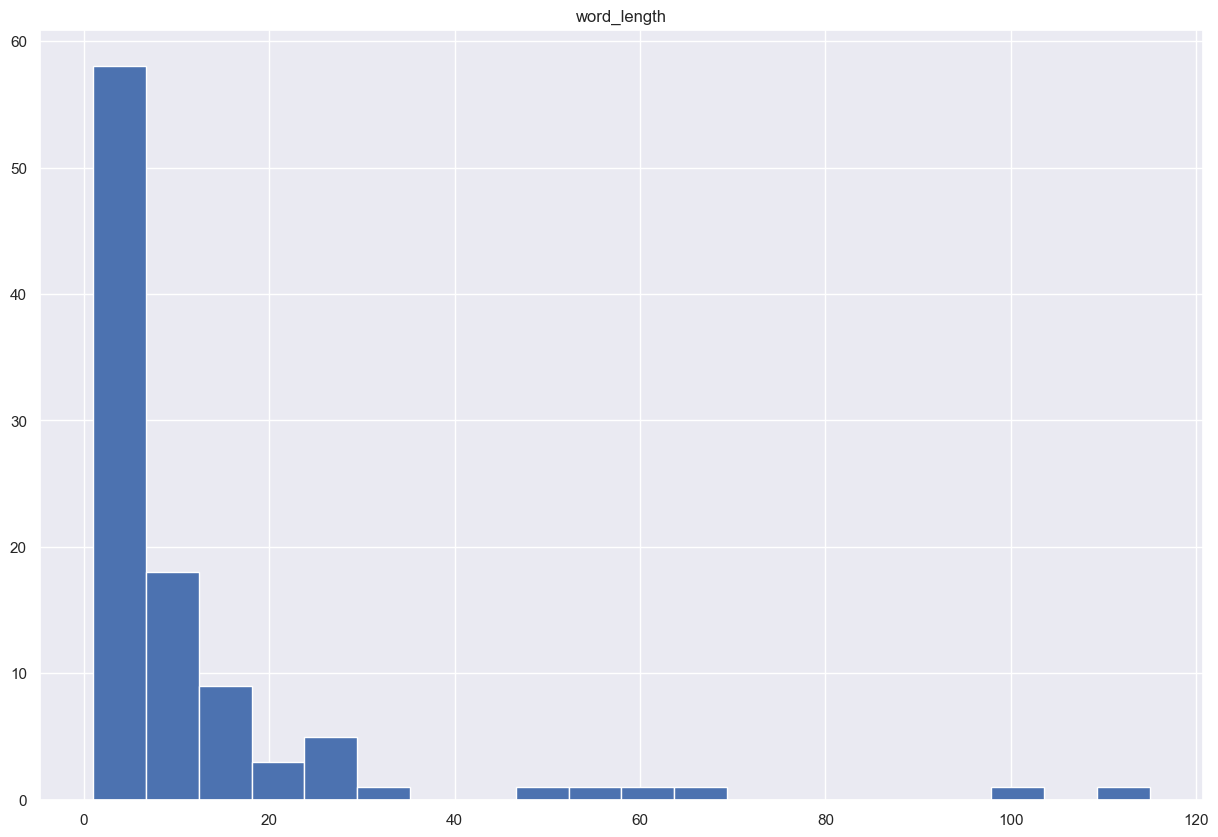

In [38]:
#Calculating text length
data_subsample[["word_length", "star_sentiment"]].hist(bins=20, figsize=(15, 10))

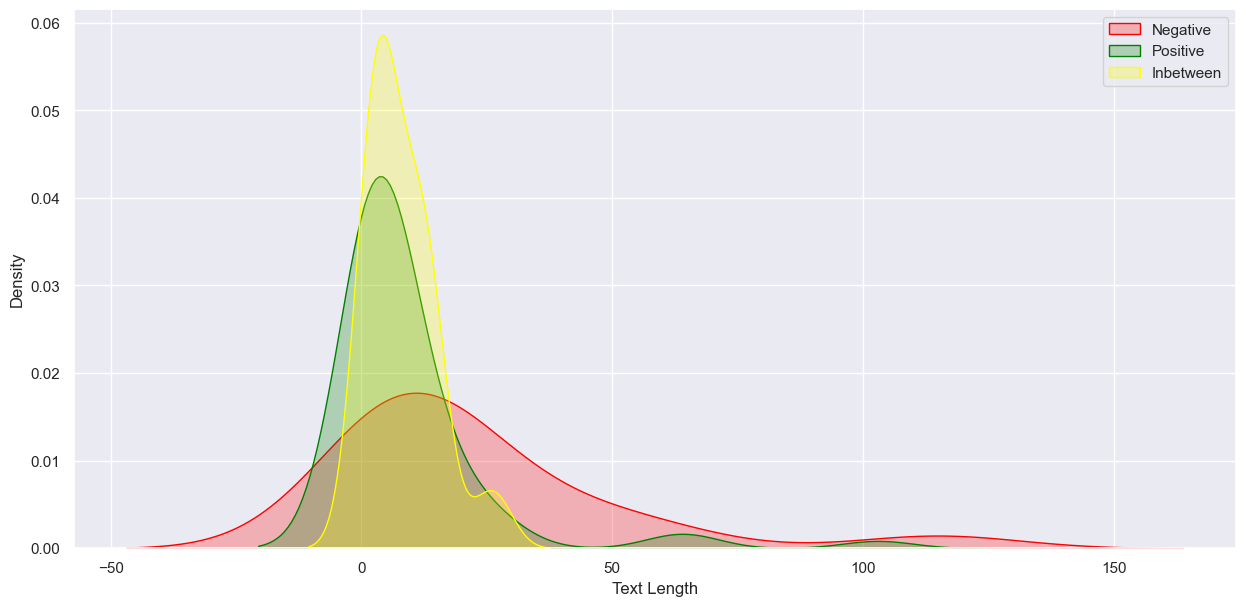

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
plt.figure(figsize=(15,7))
cmap = ['red', 'green','yellow']
labels = ['Negative', 'Positive', 'Inbetween']

for label,clr in zip(labels,cmap):
    sns.kdeplot(data_subsample.loc[(data_subsample['star_sentiment'] == label),'word_length'], color=clr, shade=True, label=label)
    plt.xlabel('Text Length')
    plt.ylabel('Density')
    plt.legend()

In [14]:
#removing punctuation and converting to lower case
import re
import string

def text_clean1(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    return text

cleaned1 = lambda x: text_clean1(x)


# using function on columns
data['cleaned_reviewheadline'] = data['review_headline'].apply(cleaned1)
data['cleaned_reviewbody'] = data['review_body'].apply(cleaned1)


#Another round of cleaning
def text_clean2(text):
    text = re.sub('\n','', text)
    return text

cleaned2 = lambda x: text_clean2(x)
data['cleaned_reviewheadline'] = data['cleaned_reviewheadline'].apply(cleaned2)
data['cleaned_reviewbody'] = data['cleaned_reviewbody'].apply(cleaned2)

data.head()


customer_id       review_id  product_id  product_parent  \
0     12039526   RTIS3L2M1F5SM  B001CXYMFS       737716809   
1      9636577   R1ZV7R40OLHKD  B00M920ND6       569686175   
2      2331478  R3BH071QLH8QMC  B0029CSOD2        98937668   
3     52495923  R127K9NTSXA2YH  B00GOOSV98        23143350   
4     14533949  R32ZWUXDJPW27Q  B00Y074JOM       821342511   

                                       product_title product_category  \
0         Thrustmaster T-Flight Hotas X Flight Stick      Video Games   
1  Tonsee 6 buttons Wireless Optical Silent Gamin...      Video Games   
2  Hidden Mysteries: Titanic Secrets of the Fatef...      Video Games   
3  GelTabz Performance Thumb Grips - PlayStation ...      Video Games   
4  Zero Suit Samus amiibo - Japan Import (Super S...      Video Games   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            1              0            1    N                 Y   
3            3              0            0    N                 Y   
4            4              0            0    N                 Y   

                                     review_headline  \
0  an amazing joystick. i especially love that yo...   
1  definitely a silent mouse... not a single clic...   
2                                           one star   
3                          good, but could be bettee   
4                                  great but flawed.   

                                         review_body review_date  \
0  used this for elite dangerous on my mac, an am...  2015-08-31   
1  loved it,  i didn't even realise it was a gami...  2015-08-31   
2     poor quality work and not as it is advertised.  2015-08-31   
3  nice, but tend to slip away from stick in inte...  2015-08-31   
4  great amiibo, great for collecting. quality ma...  2015-08-31   

                              cleaned_reviewheadline  \
0  an amazing joystick i especially love that you...   
1  definitely a silent mouse not a single click w...   
2                                           one star   
3                           good but could be bettee   
4                                   great but flawed   

                                  cleaned_reviewbody  
0  used this for elite dangerous on my mac an ama...  
1  loved it  i didnt even realise it was a gaming...  
2      poor quality work and not as it is advertised  
3  nice but tend to slip away from stick in inten...  
4  great amiibo great for collecting quality mate...

In [15]:
#Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
data['cleaned_reviewbody'] = data['cleaned_reviewbody'].apply(lambda words: ' '.join(word.lower() for word in words.split()if word not in stopwords))
data.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\R0088258\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


customer_id       review_id  product_id  product_parent  \
0     12039526   RTIS3L2M1F5SM  B001CXYMFS       737716809   
1      9636577   R1ZV7R40OLHKD  B00M920ND6       569686175   
2      2331478  R3BH071QLH8QMC  B0029CSOD2        98937668   
3     52495923  R127K9NTSXA2YH  B00GOOSV98        23143350   
4     14533949  R32ZWUXDJPW27Q  B00Y074JOM       821342511   

                                       product_title product_category  \
0         Thrustmaster T-Flight Hotas X Flight Stick      Video Games   
1  Tonsee 6 buttons Wireless Optical Silent Gamin...      Video Games   
2  Hidden Mysteries: Titanic Secrets of the Fatef...      Video Games   
3  GelTabz Performance Thumb Grips - PlayStation ...      Video Games   
4  Zero Suit Samus amiibo - Japan Import (Super S...      Video Games   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            1              0            1    N                 Y   
3            3              0            0    N                 Y   
4            4              0            0    N                 Y   

                                     review_headline  \
0  an amazing joystick. i especially love that yo...   
1  definitely a silent mouse... not a single clic...   
2                                           one star   
3                          good, but could be bettee   
4                                  great but flawed.   

                                         review_body review_date  \
0  used this for elite dangerous on my mac, an am...  2015-08-31   
1  loved it,  i didn't even realise it was a gami...  2015-08-31   
2     poor quality work and not as it is advertised.  2015-08-31   
3  nice, but tend to slip away from stick in inte...  2015-08-31   
4  great amiibo, great for collecting. quality ma...  2015-08-31   

                              cleaned_reviewheadline  \
0  an amazing joystick i especially love that you...   
1  definitely a silent mouse not a single click w...   
2                                           one star   
3                           good but could be bettee   
4                                   great but flawed   

                                  cleaned_reviewbody  
0  used elite dangerous mac amazing joystick espe...  
1  loved didnt even realise gaming mouse typed 34...  
2                       poor quality work advertised  
3  nice tend slip away stick intense hard pressed...  
4  great amiibo great collecting quality material...

In [ ]:
#Tokenization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split(' ')])

data['tokenized_reviewbody'] = data['cleaned_reviewbody'].apply(lemmatize_text)
data.head()

In [16]:
#Text Exploratory Analysis
data['word_length'] = data['cleaned_reviewbody'].str.split().str.len()
data.head()
def sentiment(row):
    if row['star_rating'] == 5:
        return "Positive"
    elif row['star_rating'] == 1:
        return "Negative"
    elif  1 < row['star_rating'] < 5:
        return "Inbetween"
    else:
        return "Undefined"
    

data['star_sentiment'] = data.apply(sentiment,axis =1)
data.head()



customer_id       review_id  product_id  product_parent  \
0     12039526   RTIS3L2M1F5SM  B001CXYMFS       737716809   
1      9636577   R1ZV7R40OLHKD  B00M920ND6       569686175   
2      2331478  R3BH071QLH8QMC  B0029CSOD2        98937668   
3     52495923  R127K9NTSXA2YH  B00GOOSV98        23143350   
4     14533949  R32ZWUXDJPW27Q  B00Y074JOM       821342511   

                                       product_title product_category  \
0         Thrustmaster T-Flight Hotas X Flight Stick      Video Games   
1  Tonsee 6 buttons Wireless Optical Silent Gamin...      Video Games   
2  Hidden Mysteries: Titanic Secrets of the Fatef...      Video Games   
3  GelTabz Performance Thumb Grips - PlayStation ...      Video Games   
4  Zero Suit Samus amiibo - Japan Import (Super S...      Video Games   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            1              0            1    N                 Y   
3            3              0            0    N                 Y   
4            4              0            0    N                 Y   

                                     review_headline  \
0  an amazing joystick. i especially love that yo...   
1  definitely a silent mouse... not a single clic...   
2                                           one star   
3                          good, but could be bettee   
4                                  great but flawed.   

                                         review_body review_date  \
0  used this for elite dangerous on my mac, an am...  2015-08-31   
1  loved it,  i didn't even realise it was a gami...  2015-08-31   
2     poor quality work and not as it is advertised.  2015-08-31   
3  nice, but tend to slip away from stick in inte...  2015-08-31   
4  great amiibo, great for collecting. quality ma...  2015-08-31   

                              cleaned_reviewheadline  \
0  an amazing joystick i especially love that you...   
1  definitely a silent mouse not a single click w...   
2                                           one star   
3                           good but could be bettee   
4                                   great but flawed   

                                  cleaned_reviewbody  word_length  \
0  used elite dangerous mac amazing joystick espe...           17   
1  loved didnt even realise gaming mouse typed 34...           25   
2                       poor quality work advertised            4   
3  nice tend slip away stick intense hard pressed...           10   
4  great amiibo great collecting quality material...            9   

  star_sentiment  
0       Positive  
1       Positive  
2       Negative  
3      Inbetween  
4      Inbetween

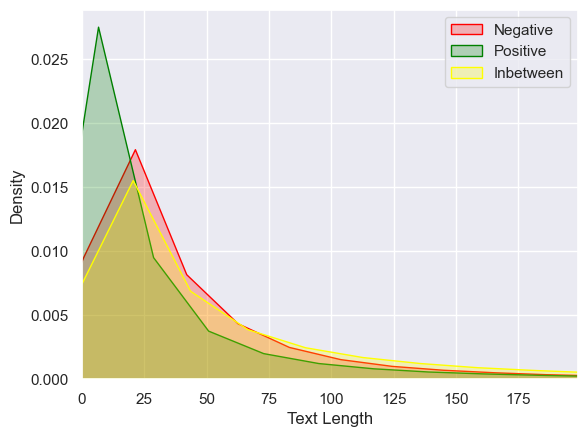

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
fig, ax = plt.subplots()
cmap = ['red', 'green','yellow']
labels = ['Negative', 'Positive', 'Inbetween']

for label,clr in zip(labels,cmap):
    sns.kdeplot(data.loc[(data['star_sentiment'] == label),'word_length'], ax=ax, color=clr, shade=True, label=label)
    ax.set_xlim(0,199)
    plt.xlabel('Text Length')
    plt.ylabel('Density')
    plt.legend()
   

### Word Cloud

In [69]:
# Easy and approximate detection of english by scanning reviews for " the ", " and ", "but"
import numpy as np
english_words = ["great", "game", " and ", "the ", "but ", "good", " bad ", " this ", " my ", "awesome", "love", "have", " be ", " it ", " was ",\
     " an ", "they", "did", "not", "quality", "poor", "perfect", "it ", "for", "his", "work", "recommend", "nice", "excellent", "fantastic", "issues", "very", "my", "gift",\
        "with", "ok", "can", "just", "you", "memory", "thanks", "now", "uses", "fun", "too", "decent", "problems", "good", "want", "please", "want", "there", "are", "product", "believ",\
                "like", "again", "only", "much ", "please", " i ", "buy", "what", "money", "waste", " at ", "able", "worth", "try", "epic", "amazing",  "play", "brilliant", "don't",\
                        "better", " way", "about", "stupid", " run", "bring", "version", " of ", " as ", "it's", "ever", " me ", "how", " by "]
# Could use stopwords, but running time increases with every list member several seconds

data=data.dropna(subset="review_body")
data["language"] = data["review_body"].apply(lambda x: "EN" if (np.any([s in x.lower() for s in english_words])) else "OTHER")

In [70]:
data.value_counts("language")


language
EN       1753198
OTHER      27011
dtype: int64

In [71]:
data[data["language"]!="EN"]["review_body"].tail(40)

1649342    boring boring boring boring boring boring bori...
1657444    este juego es uno de los mejore que e jugado <...
1659805                           Hi Hi HI HI HI HI HI HI HI
1671419    Buggy!<BR>Terrible:<BR>UI<BR>Voice acting<BR>S...
1676449    gfyvtkgthgnkjghktf el oioi laoiuo lkjkkljlkk h...
1689042                                   posted twice sorry
1693669    01010010  01101111  01101111  01101111  011000...
1694640                    I am still waiting to receive it.
1696227    Tab tab tab tab tab Tab tab tab tab tab tab Ta...
1697721    jhf asdjh fjks hdfjakshdf ljks fhdlkjsdhf kjsd...
1698019    super super super super super super super supe...
1698358    ESTIMADOS AMIGOS NO ENCUENTRA LA SALIDA, YA QU...
1699609    &lt;droool&gt;..so pretty...so creepy...I wann...
1699829    bilo bi lepo nesto reci samo kad bi se znalo p...
1702108    Este juego es una cochinada mejor ni lo compre...
1703226                                           2002-04-12
1705274    Aqui tienen u

In [72]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()


stop_words.update(["car", "work", "product", "install"])

def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string 
    for word in word_tokenize(text):
        if word.lower() not in stop_words:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha(): # filter out non alphabet words like emoji
            filtered_tokens.append(token)
            
    # stemming
    # Removes ing also in anything ...
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return_string = " ".join(stems)
    
    return return_string


In [73]:
#data = data.dropna(subset=['review_body'])
data_en = data[data["language"]=="EN"]


In [74]:

processed_reviews = data_en["review_body"].apply(lambda x: tokenization_and_stemming(x))

In [75]:
processed_reviews.head(3)

0    use elit danger mac amaz joystick especi love ...
1    love even realis game mous type silent mous se...
2                                poor qualiti advertis
Name: review_body, dtype: object

In [76]:
data_en["processed_reviews"] = processed_reviews

C:\Users\A058252\AppData\Local\Temp/ipykernel_8016/3760767301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en["processed_reviews"] = processed_reviews


In [177]:
import os
os.getcwd()
data_en.to_pickle(r"../../data/data_en.pickle")

In [134]:
tokens = processed_reviews.apply(lambda x: x.split(" "))
tokens.head()

0    [use, elit, danger, mac, amaz, joystick, espec...
1    [love, even, realis, game, mous, type, silent,...
2                            [poor, qualiti, advertis]
3    [nice, tend, slip, away, stick, intens, hard, ...
4    [great, amiibo, great, collect, qualiti, mater...
Name: review_body, dtype: object

In [ ]:
token_list = [item for sublist in list(tokens) for item in sublist] 
token_string = " ".join(token_list)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def return_word_occurences(token_string, stopwords_in = None):
    vectorizer = CountVectorizer(stop_words = stopwords_in)
    #vectorizer.fit_transform(token_list)
    X = vectorizer.fit_transform([token_string])
    #vocab = vectorizer.vocabulary_
    words = vectorizer.get_feature_names_out()
    word_occurences = X.toarray().sum(axis=0)
    word_occurences_dict = dict(zip(words, word_occurences))
    sorted_occurences = sorted(word_occurences_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_occurences

In [178]:
sorted_occurences_initial = return_word_occurences(token_string)
sorted_occurences_initial

pd.DataFrame(sorted_occurences_initial).to_csv(r"../../data/word_occurences.csv")

In [174]:
stop_words_cv = set(stopwords.words('english'))
stop_words_cv.update(["game", "br", "play", "get", "one", "would", "make", "first"])

#Update inspired by word cloud per rating class
stop_words_cv_enh = stop_words_cv
stop_words_cv_enh.update(["like", "control", "time"])

sorted_occurences_sw = return_word_occurences(token_string, stopwords_in=stop_words_cv)
sorted_occurences_sw

[('great', 640619),
 ('good', 535298),
 ('use', 484480),
 ('fun', 457780),
 ('realli', 443723),
 ('love', 403850),
 ('much', 366039),
 ('even', 353403),
 ('go', 340585),
 ('also', 334522),
 ('look', 324611),
 ('well', 323701),
 ('buy', 319888),
 ('new', 312787),
 ('graphic', 310471),
 ('thing', 303506),
 ('want', 289905),
 ('charact', 279910),
 ('still', 260124),
 ('better', 256081),
 ('way', 252902),
 ('work', 250980),
 ('lot', 243873),
 ('best', 238381),
 ('could', 236378),
 ('stori', 236204),
 ('say', 226121),
 ('got', 226007),
 ('level', 224915),
 ('take', 220189),
 ('player', 220022),
 ('tri', 218599),
 ('littl', 213825),
 ('feel', 210116),
 ('think', 208269),
 ('need', 206818),
 ('mani', 204355),
 ('system', 203998),
 ('enjoy', 199351),
 ('year', 197265),
 ('come', 195953),
 ('differ', 192972),
 ('back', 190825),
 ('peopl', 186556),
 ('see', 183199),
 ('bought', 179357),
 ('find', 177729),
 ('xbox', 174841),
 ('know', 174658),
 ('give', 171385),
 ('hour', 166075),
 ('pretti', 165

In [140]:
#data = data.dropna(subset="processed_reviews")
processed_review_string = data_en.groupby("star_rating").aggregate({"processed_reviews":lambda x: " ".join(x)})

In [152]:
processed_review_string.loc[1]

processed_reviews    poor qualiti advertis remot constant adjust or...
Name: 1, dtype: object

In [171]:
def wc_for_rating(rating, stopwords_in = None, max_words = 100, collocations = False):
    plt.figure(figsize = (20,20))
    wordcloud = WordCloud(collocations=collocations, stopwords = stopwords_in, max_words = max_words).generate(processed_review_string.loc[rating][0])
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

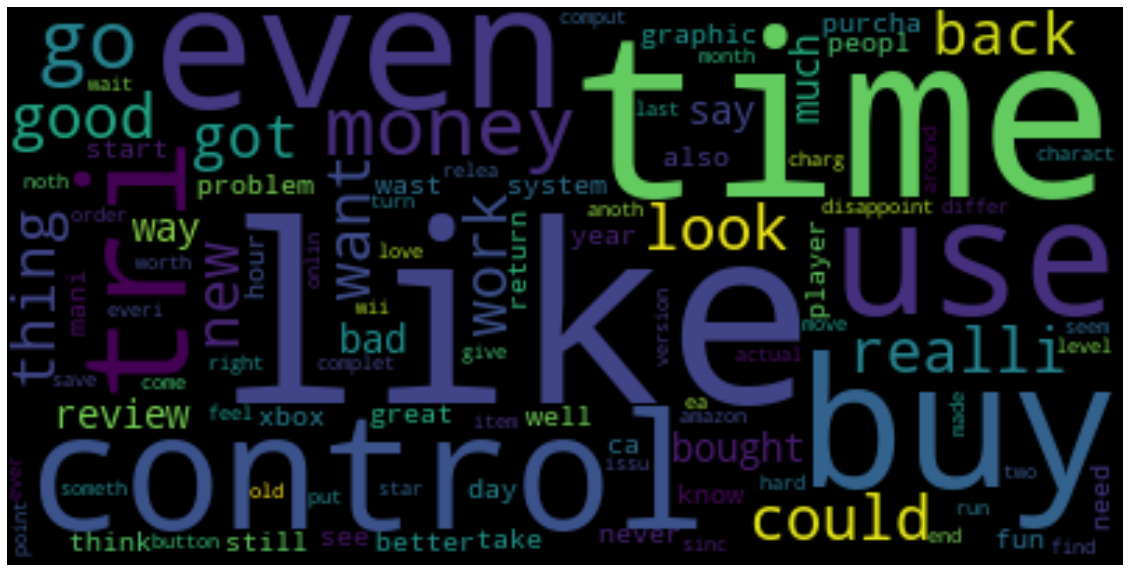

In [172]:
wc_for_rating(1, stopwords_in= stop_words_cv)

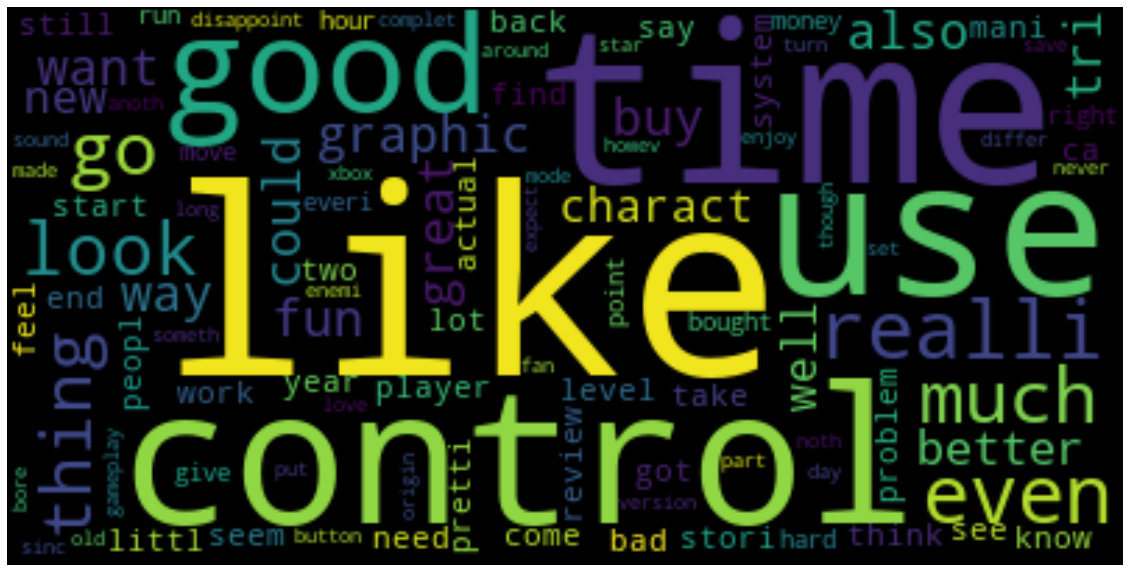

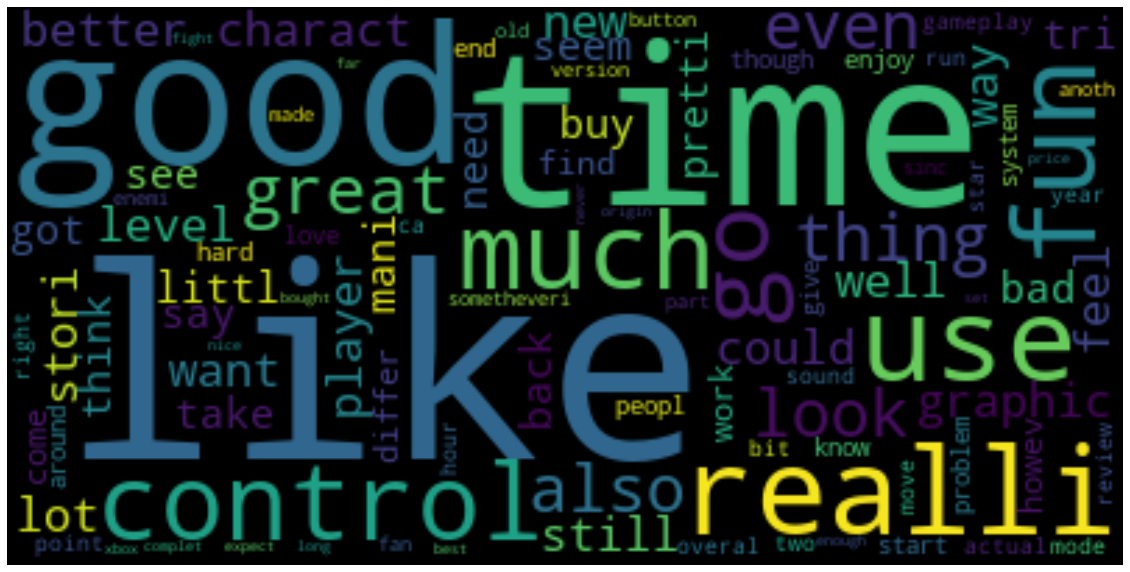

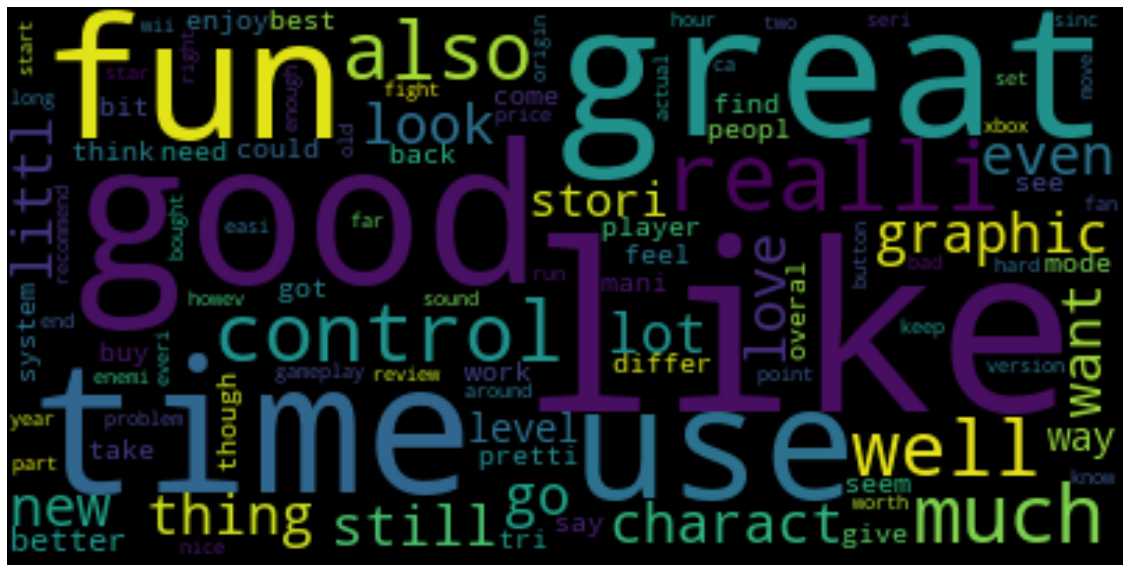

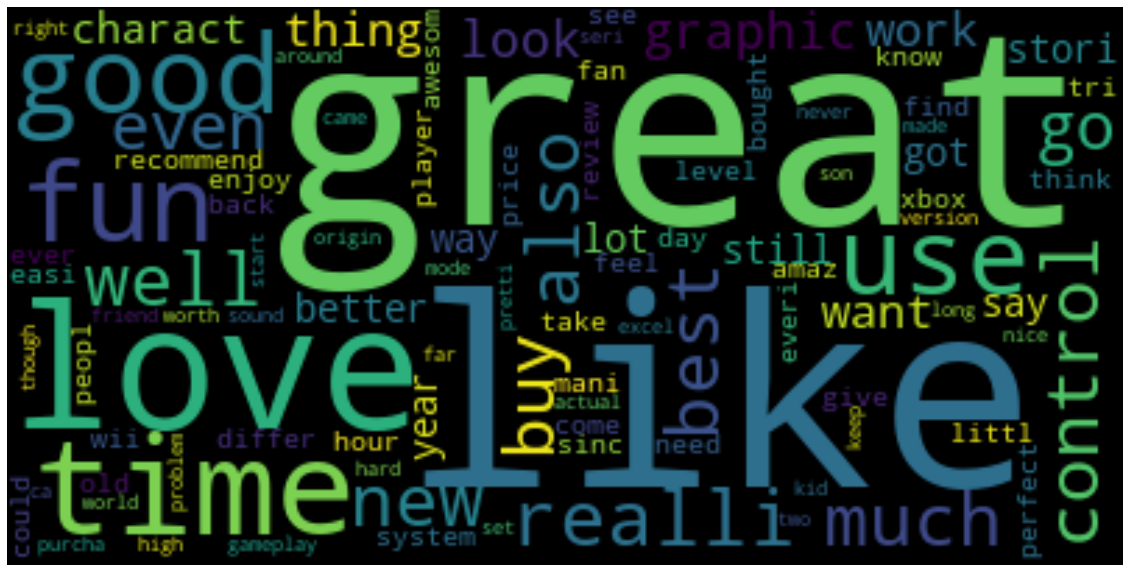

In [173]:
#wc_for_rating(1, stopwords_in= stop_words_cv)
wc_for_rating(2, stopwords_in= stop_words_cv)
wc_for_rating(3, stopwords_in= stop_words_cv)
wc_for_rating(4, stopwords_in= stop_words_cv)
wc_for_rating(5, stopwords_in= stop_words_cv)

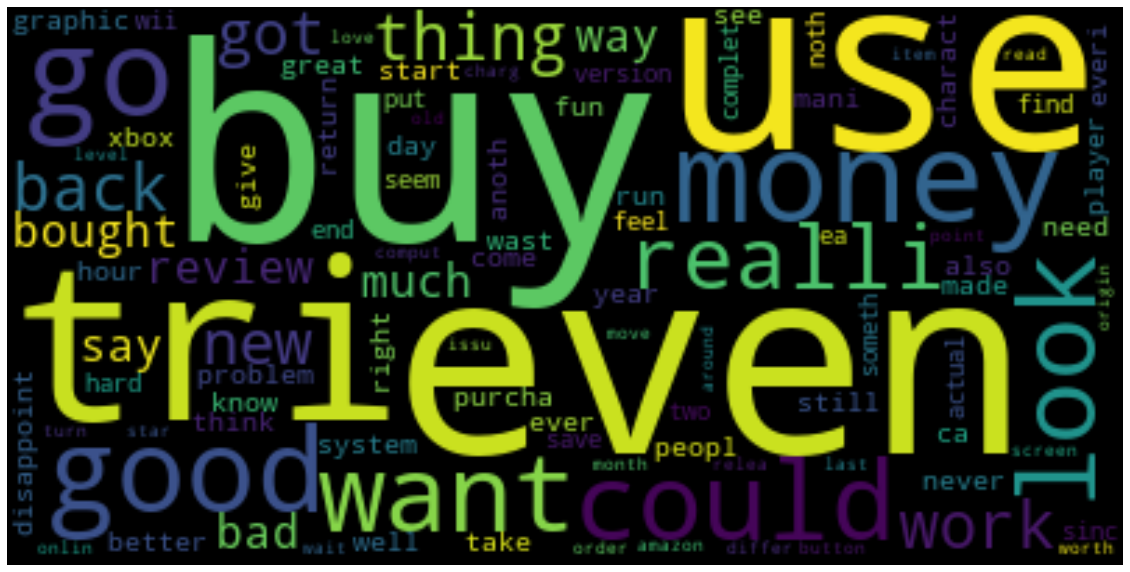

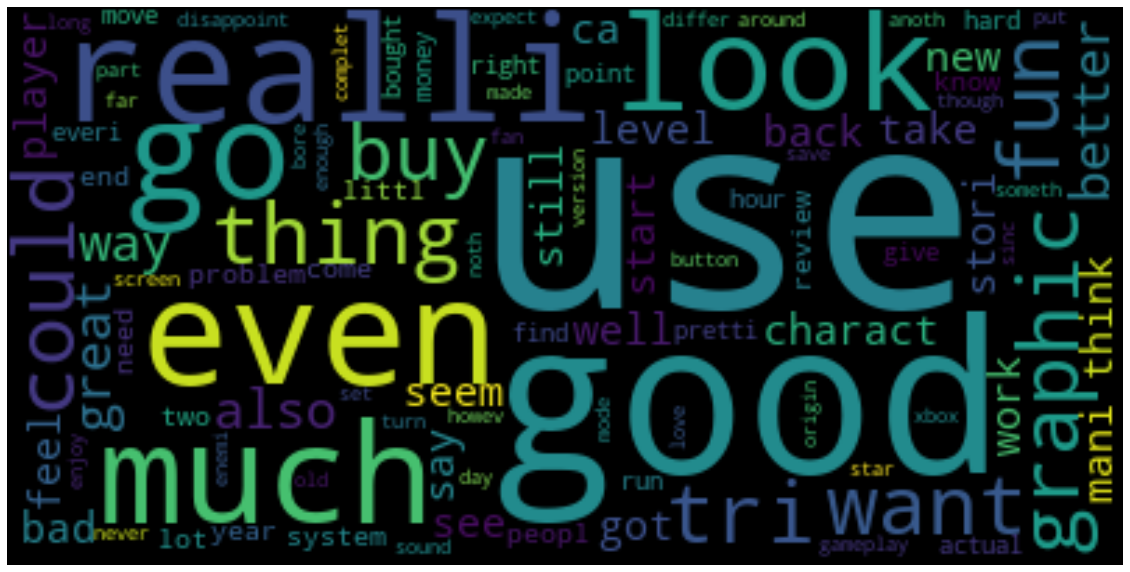

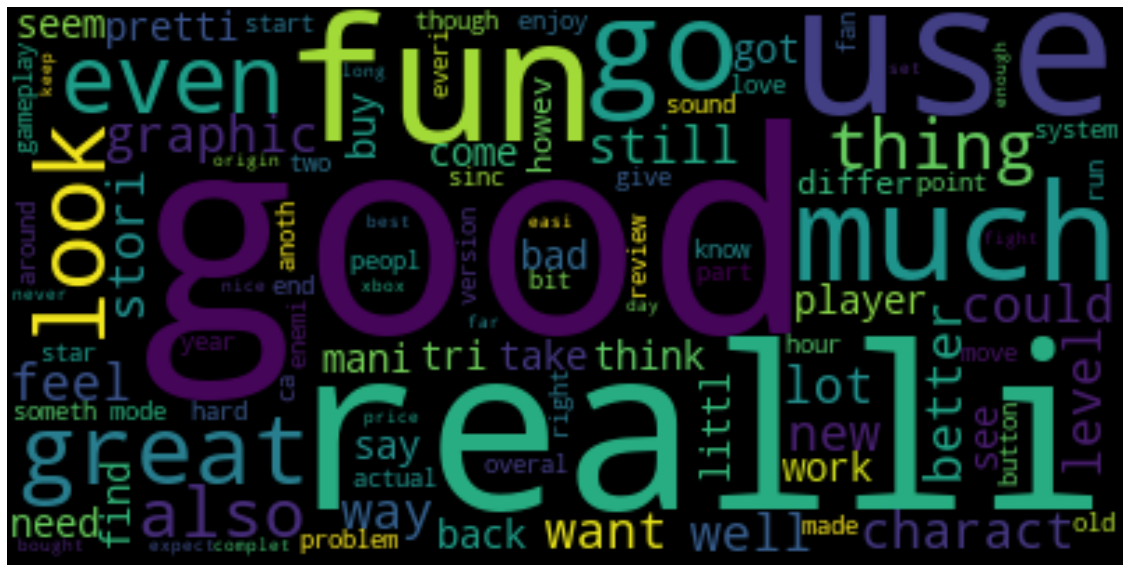

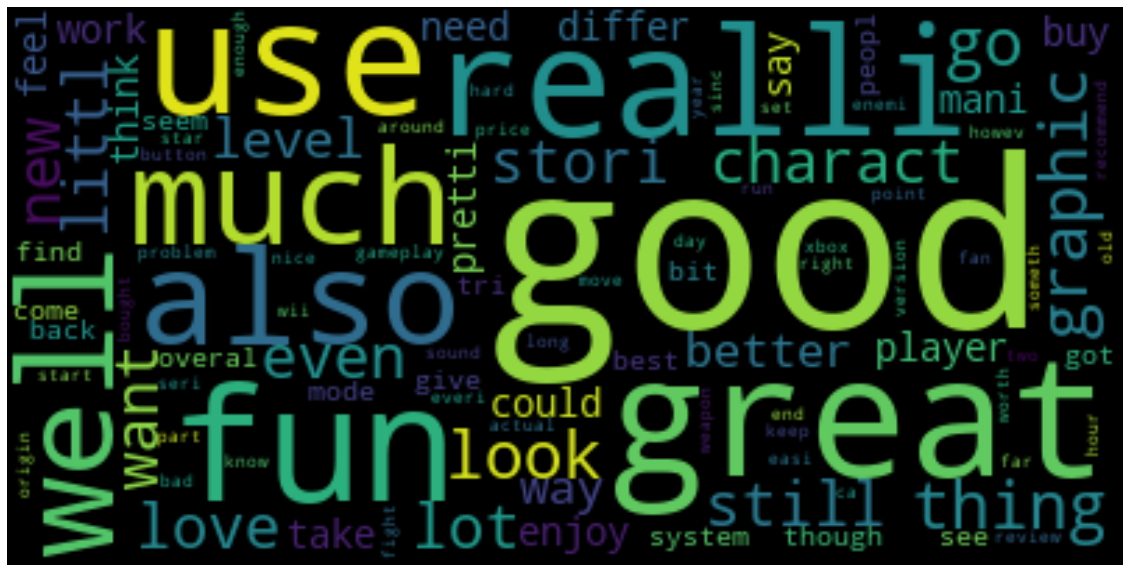

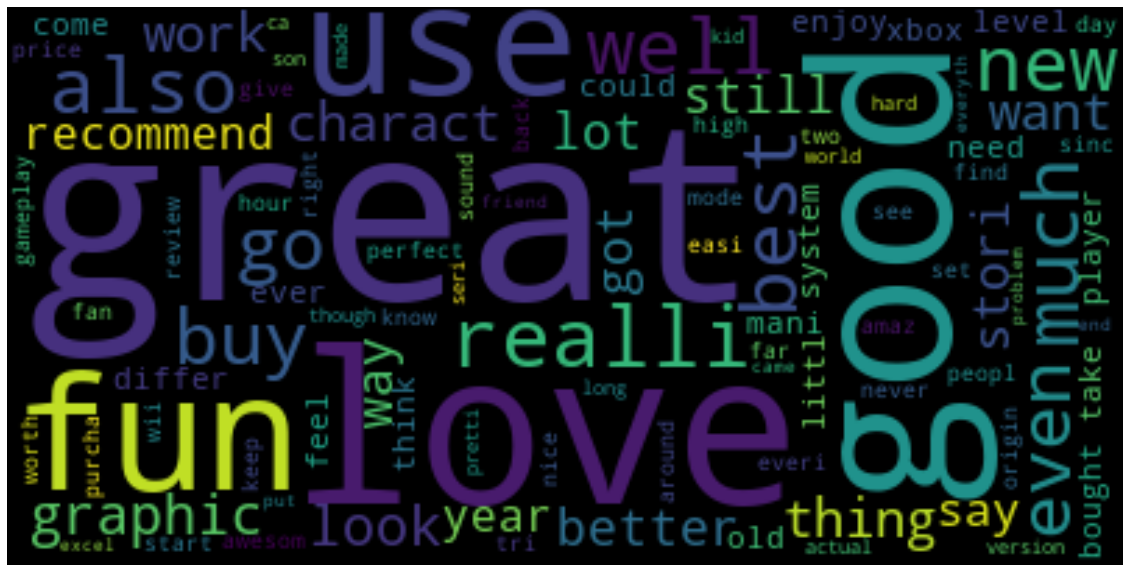

In [175]:
wc_for_rating(1, stopwords_in= stop_words_cv_enh)
wc_for_rating(2, stopwords_in= stop_words_cv_enh)
wc_for_rating(3, stopwords_in= stop_words_cv_enh)
wc_for_rating(4, stopwords_in= stop_words_cv_enh)
wc_for_rating(5, stopwords_in= stop_words_cv_enh)

In [69]:
if True:
    data.to_csv(r"D:\DSProject\VideoGames_transformed.csv")
else:
    data = pd.read_csv(r"D:\DSProject\amazon_reviews_us_Automotive_v1_00_transformed.csv")

In [70]:
data.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     12039526   RTIS3L2M1F5SM  B001CXYMFS       737716809   
1          US      9636577   R1ZV7R40OLHKD  B00M920ND6       569686175   
2          US      2331478  R3BH071QLH8QMC  B0029CSOD2        98937668   
3          US     52495923  R127K9NTSXA2YH  B00GOOSV98        23143350   
4          US     14533949  R32ZWUXDJPW27Q  B00Y074JOM       821342511   

                                       product_title product_category  \
0         Thrustmaster T-Flight Hotas X Flight Stick      Video Games   
1  Tonsee 6 buttons Wireless Optical Silent Gamin...      Video Games   
2  Hidden Mysteries: Titanic Secrets of the Fatef...      Video Games   
3  GelTabz Performance Thumb Grips - PlayStation ...      Video Games   
4  Zero Suit Samus amiibo - Japan Import (Super S...      Video Games   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            1              0            1    N                 Y   
3            3              0            0    N                 Y   
4            4              0            0    N                 Y   

                                     review_headline  \
0  an amazing joystick. I especially love that yo...   
1  Definitely a silent mouse... Not a single clic...   
2                                           One Star   
3                          good, but could be bettee   
4                                  Great but flawed.   

                                         review_body review_date  \
0  Used this for Elite Dangerous on my mac, an am...  2015-08-31   
1  Loved it,  I didn't even realise it was a gami...  2015-08-31   
2     poor quality work and not as it is advertised.  2015-08-31   
3  nice, but tend to slip away from stick in inte...  2015-08-31   
4  Great amiibo, great for collecting. Quality ma...  2015-08-31   

   rating_problems                                  processed_reviews  
0            False  use elit danger mac amaz joystick especi love ...  
1            False  love even realis game mous type silent mous se...  
2            False                              poor qualiti advertis  
3            False  nice tend slip away stick intens hard press ga...  
4            False  great amiibo great collect qualiti materi desi...

In [77]:
#data = data.dropna(subset="processed_reviews")
# Lots of foreign languages in the dataset, thus filter for marketplace = US
tokens = processed_reviews.apply(lambda x: x.split(" "))


In [78]:
tokens.head()

0    [use, elit, danger, mac, amaz, joystick, espec...
1    [love, even, realis, game, mous, type, silent,...
2                            [poor, qualiti, advertis]
3    [nice, tend, slip, away, stick, intens, hard, ...
4    [great, amiibo, great, collect, qualiti, mater...
Name: review_body, dtype: object

In [79]:
token_list = [item for sublist in list(tokens) for item in sublist] 
token_string = " ".join(token_list)

In [102]:
token_string = " ".join(token_list)

In [131]:
from sklearn.feature_extraction.text import CountVectorizer

def return_word_occurences(token_string, stopwords_in = None):
    vectorizer = CountVectorizer(stop_words = stopwords_in)
    #vectorizer.fit_transform(token_list)
    X = vectorizer.fit_transform([token_string])
    #vocab = vectorizer.vocabulary_
    words = vectorizer.get_feature_names_out()
    word_occurences = X.toarray().sum(axis=0)
    word_occurences_dict = dict(zip(words, word_occurences))
    sorted_occurences = sorted(word_occurences_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_occurences

In [127]:
sorted_occurences_initial = return_word_occurences(token_string)
sorted_occurences_initial

In [128]:
sorted_occurences_initial

[('game', 3657794),
 ('br', 2124721),
 ('play', 1216010),
 ('like', 867386),
 ('get', 793269),
 ('one', 761116),
 ('great', 640619),
 ('time', 578388),
 ('good', 535298),
 ('use', 484480),
 ('fun', 457780),
 ('would', 452531),
 ('realli', 443723),
 ('control', 417529),
 ('love', 403850),
 ('make', 387167),
 ('much', 366039),
 ('even', 353403),
 ('go', 340585),
 ('also', 334522),
 ('first', 331609),
 ('look', 324611),
 ('well', 323701),
 ('buy', 319888),
 ('new', 312787),
 ('graphic', 310471),
 ('thing', 303506),
 ('want', 289905),
 ('charact', 279910),
 ('still', 260124),
 ('better', 256081),
 ('way', 252902),
 ('work', 250980),
 ('lot', 243873),
 ('best', 238381),
 ('could', 236378),
 ('stori', 236204),
 ('say', 226121),
 ('got', 226007),
 ('level', 224915),
 ('take', 220189),
 ('player', 220022),
 ('tri', 218599),
 ('littl', 213825),
 ('feel', 210116),
 ('think', 208269),
 ('need', 206818),
 ('mani', 204355),
 ('system', 203998),
 ('enjoy', 199351),
 ('year', 197265),
 ('come', 19595

In [132]:
stop_words_cv = set(stopwords.words('english'))
stop_words_cv.update(["game", "br", "play", "get", "one", "would", "make"])

sorted_occurences_sw = return_word_occurences(token_string, stopwords_in=stop_words_cv)
sorted_occurences_sw

In [133]:
sorted_occurences_sw

[('like', 867386),
 ('great', 640619),
 ('time', 578388),
 ('good', 535298),
 ('use', 484480),
 ('fun', 457780),
 ('realli', 443723),
 ('control', 417529),
 ('love', 403850),
 ('much', 366039),
 ('even', 353403),
 ('go', 340585),
 ('also', 334522),
 ('first', 331609),
 ('look', 324611),
 ('well', 323701),
 ('buy', 319888),
 ('new', 312787),
 ('graphic', 310471),
 ('thing', 303506),
 ('want', 289905),
 ('charact', 279910),
 ('still', 260124),
 ('better', 256081),
 ('way', 252902),
 ('work', 250980),
 ('lot', 243873),
 ('best', 238381),
 ('could', 236378),
 ('stori', 236204),
 ('say', 226121),
 ('got', 226007),
 ('level', 224915),
 ('take', 220189),
 ('player', 220022),
 ('tri', 218599),
 ('littl', 213825),
 ('feel', 210116),
 ('think', 208269),
 ('need', 206818),
 ('mani', 204355),
 ('system', 203998),
 ('enjoy', 199351),
 ('year', 197265),
 ('come', 195953),
 ('differ', 192972),
 ('back', 190825),
 ('peopl', 186556),
 ('see', 183199),
 ('bought', 179357),
 ('find', 177729),
 ('xbox', 1

In [80]:
data.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'rating_problems',
       'processed_reviews'],
      dtype='object')

In [81]:
import re
r = re.compile(r"[a-zA-Z]+")
test = r.match('çáêôæíô')
test2 = r.match('windshiield')

token_list_an = [item for item in token_list_us if not (r.match(item) is None)] 

### N-Gram

#### pre-processing

In [65]:
# take the sample data for testing code (faster)
# data_test = data.sample(frac=.1)
data_test = data.copy()

In [66]:
# remove special characters
import re

In [67]:
# define function that removes special characters
def remove_special_characters(text):
    return re.sub("[^A-Za-z]+", " ", text).strip()

In [68]:
# remove special characters in the string
data_test['review_headline_wo_punctuations']= data_test['review_headline'].apply(lambda x:remove_special_characters(x))
data_test.head()

customer_id       review_id  product_id  product_parent  \
0     12039526   RTIS3L2M1F5SM  B001CXYMFS       737716809   
1      9636577   R1ZV7R40OLHKD  B00M920ND6       569686175   
2      2331478  R3BH071QLH8QMC  B0029CSOD2        98937668   
3     52495923  R127K9NTSXA2YH  B00GOOSV98        23143350   
4     14533949  R32ZWUXDJPW27Q  B00Y074JOM       821342511   

                                       product_title product_category  \
0         Thrustmaster T-Flight Hotas X Flight Stick      Video Games   
1  Tonsee 6 buttons Wireless Optical Silent Gamin...      Video Games   
2  Hidden Mysteries: Titanic Secrets of the Fatef...      Video Games   
3  GelTabz Performance Thumb Grips - PlayStation ...      Video Games   
4  Zero Suit Samus amiibo - Japan Import (Super S...      Video Games   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            1              0            1    N                 Y   
3            3              0            0    N                 Y   
4            4              0            0    N                 Y   

                                     review_headline  \
0  an amazing joystick. I especially love that yo...   
1  Definitely a silent mouse... Not a single clic...   
2                                           One Star   
3                          good, but could be bettee   
4                                  Great but flawed.   

                                         review_body review_date  \
0  Used this for Elite Dangerous on my mac, an am...  2015-08-31   
1  Loved it,  I didn't even realise it was a gami...  2015-08-31   
2     poor quality work and not as it is advertised.  2015-08-31   
3  nice, but tend to slip away from stick in inte...  2015-08-31   
4  Great amiibo, great for collecting. Quality ma...  2015-08-31   

                     review_headline_wo_punctuations  
0  an amazing joystick I especially love that you...  
1  Definitely a silent mouse Not a single click w...  
2                                           One Star  
3                           good but could be bettee  
4                                   Great but flawed

In [69]:
data_test[(data_test['review_headline_wo_punctuations']!= data_test['review_headline']) == True]

customer_id       review_id  product_id  product_parent  \
0          12039526   RTIS3L2M1F5SM  B001CXYMFS       737716809   
1           9636577   R1ZV7R40OLHKD  B00M920ND6       569686175   
3          52495923  R127K9NTSXA2YH  B00GOOSV98        23143350   
4          14533949  R32ZWUXDJPW27Q  B00Y074JOM       821342511   
12         52738710  R15DUT1VIJ9RJZ  B0053BQN34       577628462   
...             ...             ...         ...             ...   
144715     48633721  R1B8ZY4B3QNXAU  B001KC01WO       955209542   
144716     52062256  R3OZBHDT6V61RK  B001KC00HU       631385531   
144718     40583756  R3V7BTATZVG5SO  B001AUEITS       163061733   
144720     53094564  R3QRKP4DS759BP  B001AU6TQ8       801870836   
144722     18614365  R13OA3TRCM8IBM  B001AUEITS       163061733   

                                            product_title  \
0              Thrustmaster T-Flight Hotas X Flight Stick   
1       Tonsee 6 buttons Wireless Optical Silent Gamin...   
3       GelTabz Performance Thumb Grips - PlayStation ...   
4       Zero Suit Samus amiibo - Japan Import (Super S...   
12                     uDraw Gametablet with uDraw Studio   
...                                                   ...   
144715                             Build-a-lot [Download]   
144716                           Jewel Quest 2 [Download]   
144718                        Crazy Machines 2 [Download]   
144720  Crazy Machines 1 - The Wacky Contraptions Game...   
144722                        Crazy Machines 2 [Download]   

           product_category  star_rating  helpful_votes  total_votes vine  \
0               Video Games            5              0            0    N   
1               Video Games            5              0            0    N   
3               Video Games            3              0            0    N   
4               Video Games            4              0            0    N   
12              Video Games            2              0            0    N   
...                     ...          ...            ...          ...  ...   
144715  Digital_Video_Games            4              1            2    N   
144716  Digital_Video_Games            5             27           45    N   
144718  Digital_Video_Games            1              2            2    N   
144720  Digital_Video_Games            1             13           16    N   
144722  Digital_Video_Games            1             20           22    N   

       verified_purchase                                    review_headline  \
0                      Y  an amazing joystick. I especially love that yo...   
1                      Y  Definitely a silent mouse... Not a single clic...   
3                      Y                          good, but could be bettee   
4                      Y                                  Great but flawed.   
12                     Y  We have tried it with kids ages 4-7 and none o...   
...                  ...                                                ...   
144715                 N                      Lots of fun, for a run or two   
144716                 N                                  platform-specific   
144718                 N                      Should have ordered the disc.   
144720                 N     The Software May be Great, But I'll Never Know   
144722                 N                              Do Not Download This!   

                                              review_body review_date  \
0       Used this for Elite Dangerous on my mac, an am...  2015-08-31   
1       Loved it,  I didn't even realise it was a gami...  2015-08-31   
3       nice, but tend to slip away from stick in inte...  2015-08-31   
4       Great amiibo, great for collecting. Quality ma...  2015-08-31   
12      This was way too hard for my kids. We have tri...  2015-08-31   
...                                                   ...         ...   
144715  You'll get plenty of hours of fun out of this ...  2009-02-03   
144716  Hey,

#### remove stop words

In [70]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
# define remove stopwords function
def remove_stopwords(df, col):
    s = df[col].str.lower() # stopwords in the package are all in lower case
    for word in stopwords.words('english'):
        s = s.str.replace("\\b" + word + "\\b", " ", regex=True)
#         print(word + " ", end="")
    return s.str.replace("\\s+", " ", regex=True) # .strip()

# # define function: remove word if the length = 1
# def remove_single_word(s):
#     if len(s) <= 1:
#         return ''
#     else:
#         return s

# define generate_N_grams function
def generate_N_grams(text, ngram):
    text = text.strip()
    words = text.split(" ")
#     print(words)
    if len(words) < ngram:                  
        return '_'.join(words) 
    else: 
        temp=zip(*[words[i:] for i in range(0,ngram)])
        ans=['_'.join(word) for word in temp]
        return " ".join(ans).strip()

In [72]:
# for word in stopwords.words('english'):
#     print(word)

In [73]:
# test function
print(generate_N_grams("Horrible Gave a great trilogy a horrible ending",2))
# print(generate_N_grams("Horrible Gave a great trilogy a horrible ending",1))
# print(*ngrams("Horrible Gave a great trilogy a horrible ending".split(" "), 2))

# remove_stopwords(df_train[df_train.star_rating==5][:5], "review_headline_wo_punctuations")
# df_train[df_train.star_rating==5][:5]['review_headline_wo_punctuations'].str.replace("\\band\\b", "")
# print(generate_N_grams(" best",2)) # _best
# print(generate_N_grams("love ",2)) # love_
generate_N_grams("awesome text", 3)

Horrible_Gave Gave_a a_great great_trilogy trilogy_a a_horrible horrible_ending


'awesome_text'

In [74]:
# Remove stopwords 
data_test['review_headline_wo_punctuations'] = remove_stopwords(data_test, 'review_headline_wo_punctuations')

In [75]:
data_test.head(3).transpose()

0  \
customer_id                                                               12039526   
review_id                                                            RTIS3L2M1F5SM   
product_id                                                              B001CXYMFS   
product_parent                                                           737716809   
product_title                           Thrustmaster T-Flight Hotas X Flight Stick   
product_category                                                       Video Games   
star_rating                                                                      5   
helpful_votes                                                                    0   
total_votes                                                                      0   
vine                                                                             N   
verified_purchase                                                                Y   
review_headline                  an amazing joystick. I especially love that yo...   
review_body                      Used this for Elite Dangerous on my mac, an am...   
review_date                                                             2015-08-31   
review_headline_wo_punctuations             amazing joystick especially love twist   

                                                                                 1  \
customer_id                                                                9636577   
review_id                                                            R1ZV7R40OLHKD   
product_id                                                              B00M920ND6   
product_parent                                                           569686175   
product_title                    Tonsee 6 buttons Wireless Optical Silent Gamin...   
product_category                                                       Video Games   
star_rating                                                                      5   
helpful_votes                                                                    0   
total_votes                                                                      0   
vine                                                                             N   
verified_purchase                                                                Y   
review_headline                  Definitely a silent mouse... Not a single clic...   
review_body                      Loved it,  I didn't even realise it was a gami...   
review_date                                                             2015-08-31   
review_headline_wo_punctuations         definitely silent mouse single click heard   

                                                                                 2  
customer_id                                                                2331478  
review_id                                                           R3BH071QLH8QMC  
product_id                                                              B0029CSOD2  
product_parent                                                            98937668  
product_title                    Hidden Mysteries: Titanic Secrets of the Fatef...  
product_category                                                       Video Games  
star_rating                                                                      1  
helpful_votes                                                                    0  
total_votes                                                                      1  
vine                                                                             N  
verified_purchase                                                                Y  
review_headline                                                           One Star  
review_body                         poor quality work and not as it is advertised.  
review_date                                                             2015-08-31  
review_headline_wo_punctuations                     

In [45]:
# chec na in the data
print(data_test.review_headline.isna().sum())
print(data_test.star_rating.isna().sum())
# no na data in both columns

0
0


In [112]:
# only star rating 5 reviews contrain text "five stars" in review
df_train[df_train['review_headline'].str.contains("five stars")==True]['star_rating'].nunique()

5

In [76]:
stop

NameError: name 'stop' is not defined

#### split train/test data

In [78]:
y = data_test['star_rating'].values
y.shape

(1924871,)

In [77]:
x = data_test['review_headline_wo_punctuations'].values
x.shape

(1924871,)

In [79]:
from sklearn.model_selection import train_test_split

(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (1154922,)
y_train shape:  (1154922,)
x_test shape:  (769949,)
y_test shape:  (769949,)


In [80]:
df_x_train = pd.DataFrame(x_train)
df_x_train = df_x_train.rename(columns={0:'review_headline'})

df_y_train = pd.DataFrame(y_train)
df_y_train = df_y_train.rename(columns={0:'star_rating'})

df_train = pd.concat([df_x_train,df_y_train],axis=1)

df_train.head()

review_headline  star_rating
0  civil war install            1
1     best zelda yet            5
2        three stars            3
3              great            5
4         great game            5

In [81]:
df_x_test = pd.DataFrame(x_test)
df_x_test = df_x_test.rename(columns={0:'review_headline'})

df_y_test = pd.DataFrame(y_test)
df_y_test = df_y_test.rename(columns={0:'star_rating'})

df_test = pd.concat([df_x_test,df_y_test],axis=1)

df_test.head()

review_headline  star_rating
0       four stars            4
1         game fun            5
2      three stars            3
3   works dullness            3
4      three stars            3

#### define functions for bigrams and trigrams

In [82]:
# define functions for bigrams and trigrams analysis
def generate_N_grams_df(df, column_y, value_y, column_x, n_grams, dict_result):
    for text in df[df[column_y] == value_y][column_x]:
        ngram = generate_N_grams(text, n_grams)
        if len(ngram) == 1 and ngram[0] == "": # skip empty string
            pass
        if len(generate_N_grams(text, n_grams)) < n_grams:
            dict_result[text]+=1
        else:
            for word in generate_N_grams(text, n_grams).split(" "):
                dict_result[word]+=1
    
    df_result = pd.DataFrame.from_dict(dict_result, orient = 'index')
    df_result = df_result.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
    
    return df_result

#### create unigram

In [113]:
from collections import defaultdict

n_grams = 1

rating_5 = defaultdict(int)
rating_4 = defaultdict(int)
rating_3 = defaultdict(int)
rating_2 = defaultdict(int)
rating_1 = defaultdict(int)

In [116]:
# Create string with n-grams
# get the count of every word in both the columns of df_train and df_test dataframes where star_rating=5
for text in df_train[df_train.star_rating==5].review_headline:
    for word in generate_N_grams(text, n_grams).split(" "):
        rating_5[word]+=1

In [117]:
# convert dict to df
df_rating_5 = pd.DataFrame.from_dict(rating_5, orient = 'index')
df_rating_5 = df_rating_5.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
df_rating_5.tail(5)

index  # words
40110   best    35740
40111  great    96677
40112   game   110462
40113   five   129161
40114  stars   130568

In [118]:
# Create string with n-grams
# get the count of every word in both the columns of df_train and df_test dataframes where star_rating=1
for text in df_train[df_train.star_rating==1].review_headline:
    for word in generate_N_grams(text, n_grams).split(" "):
        rating_1[word]+=1

# convert dict to df
df_rating_1 = pd.DataFrame.from_dict(rating_1, orient = 'index')
df_rating_1 = df_rating_1.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
df_rating_1.tail(5)

index  # words
18538  work     6794
18539   buy     7316
18540  star    11260
18541   one    12794
18542  game    15505

In [119]:
for text in df_train[df_train.star_rating==2].review_headline:
    for word in generate_N_grams(text, n_grams).split(" "):
        rating_2[word]+=1

# convert dict to df
df_rating_2 = pd.DataFrame.from_dict(rating_2, orient = 'index')
df_rating_2 = df_rating_2.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
df_rating_2.tail(5)

index  # words
13134  great     2554
13135   good     3461
13136  stars     3941
13137    two     4017
13138   game     7025

In [120]:
for text in df_train[df_train.star_rating==3].review_headline:
    for word in generate_N_grams(text, n_grams).split(" "):
        rating_3[word]+=1

# convert dict to df
df_rating_3 = pd.DataFrame.from_dict(rating_3, orient = 'index')
df_rating_3 = df_rating_3.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
df_rating_3.tail(5)

index  # words
16526  great     6741
16527  three     8296
16528  stars     8658
16529   good    10302
16530   game    13499

In [121]:
for text in df_train[df_train.star_rating==4].review_headline:
    for word in generate_N_grams(text, n_grams).split(" "):
        rating_4[word]+=1

# convert dict to df
df_rating_4 = pd.DataFrame.from_dict(rating_4, orient = 'index')
df_rating_4 = df_rating_4.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
df_rating_4.tail(5)

index  # words
22919   four    19154
22920  stars    19748
22921   good    26399
22922  great    28195
22923   game    38523

In [92]:
#focus on more frequently occuring words for top and lowest ratings
#sort in DO wrt 2nd column in each of top and lowest ratings
df_rating_5['index'][-10:]

11061      works
11062       love
11063    awesome
11064       good
11065        fun
11066       best
11067      great
11068       game
11069       five
11070      stars
Name: index, dtype: object

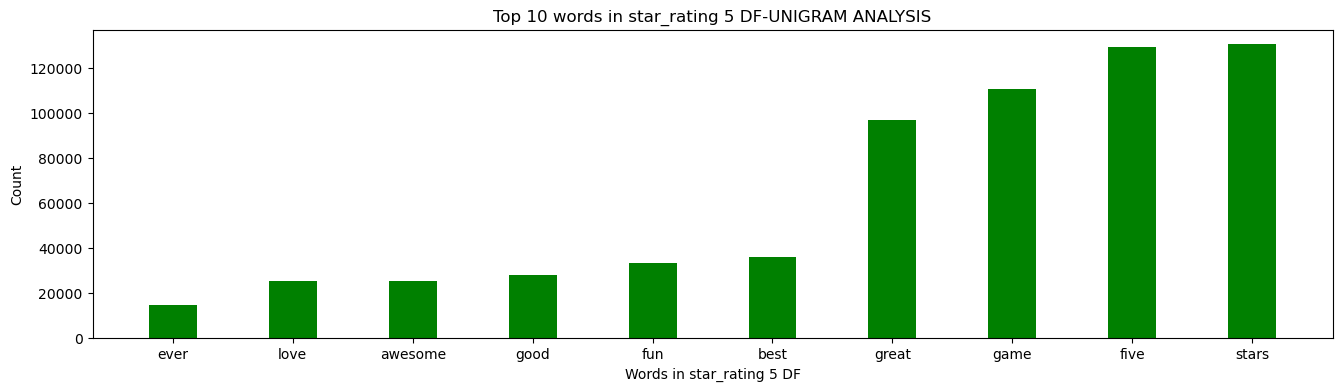

In [122]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_5['index'][-10:], df_rating_5['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 5 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 5 DF-UNIGRAM ANALYSIS")
plt.show()

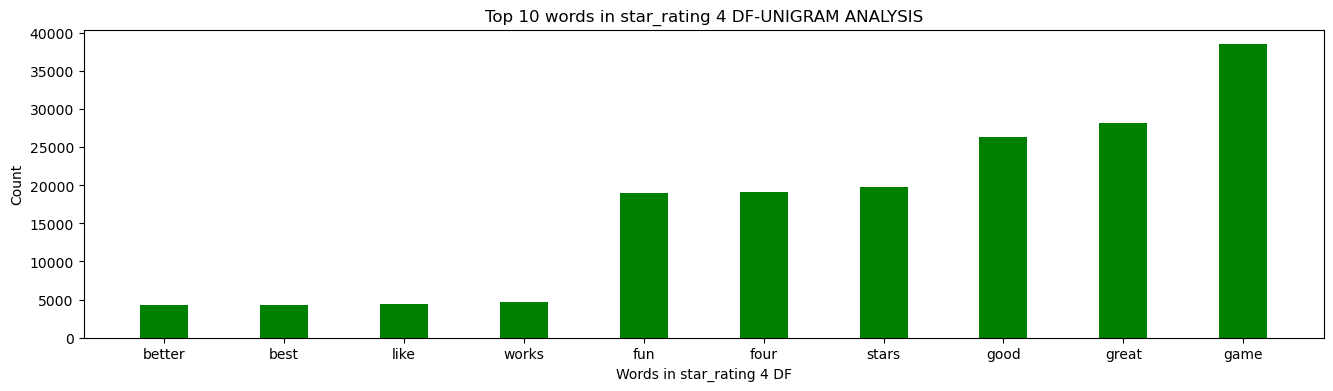

In [123]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_4['index'][-10:], df_rating_4['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 4 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 4 DF-UNIGRAM ANALYSIS")
plt.show()

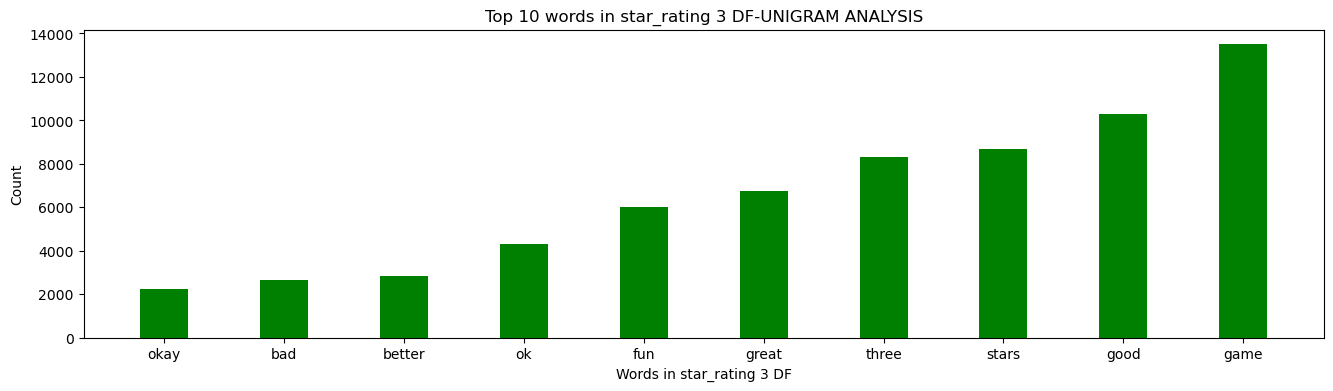

In [124]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_3['index'][-10:], df_rating_3['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 3 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 3 DF-UNIGRAM ANALYSIS")
plt.show()

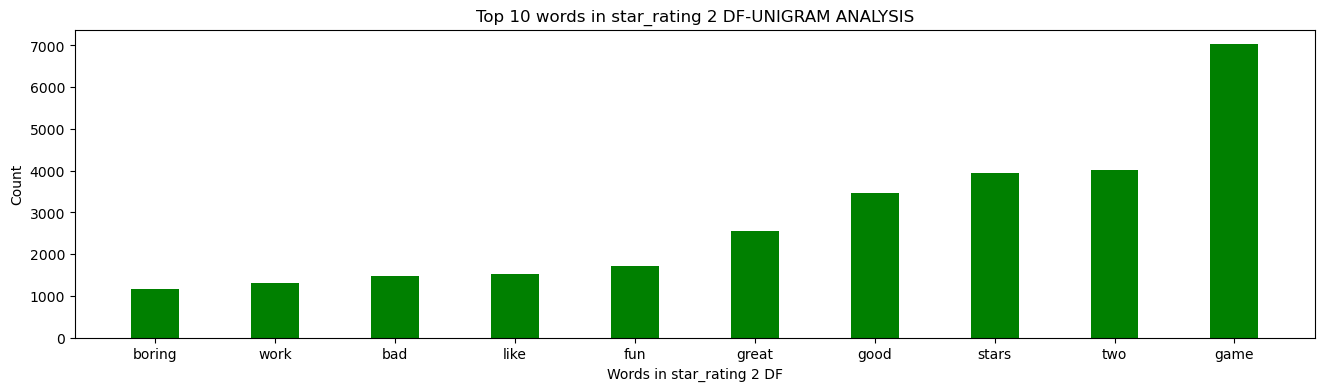

In [125]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_2['index'][-10:], df_rating_2['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 2 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 2 DF-UNIGRAM ANALYSIS")
plt.show()

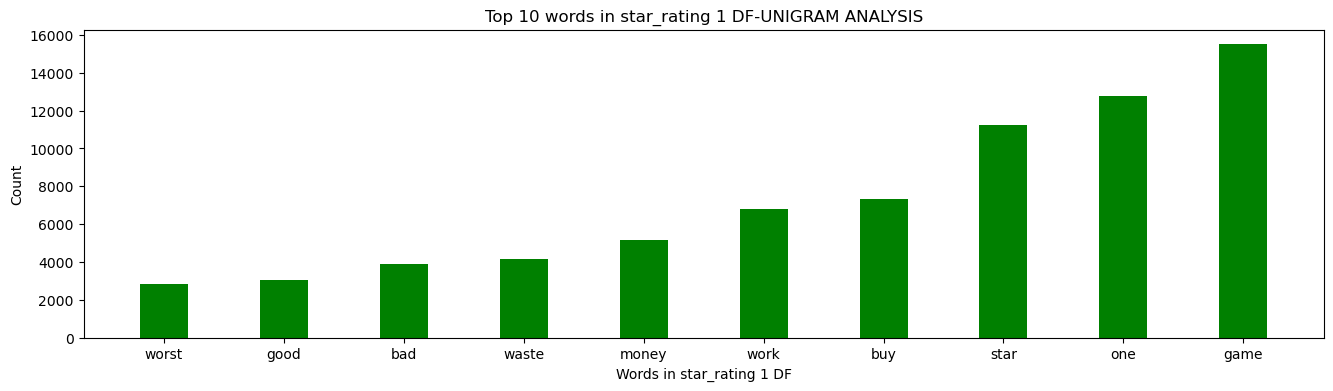

In [126]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_1['index'][-10:], df_rating_1['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 1 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 1 DF-UNIGRAM ANALYSIS")
plt.show()

In [127]:
# Alternative directly use ngrams package --> only works with single string
# get individual words
# tokenized = text.split()

# for text in df_train[df_train.star_rating==5].review_headline_wo_punctuations:
#     print(text)
#     tokenized = text.split()
#     print(tokenized)
#     for word in tokenized:
#         rating_5_v2['word']
#         print(ngrams(tokenized, 2))
#     stop

In [128]:
# test = ngrams(tokenized, 2)
# collections.Counter(test)

#### create bigrams

In [138]:
from collections import defaultdict

rating_5 = defaultdict(int)
rating_4 = defaultdict(int)
rating_3 = defaultdict(int)
rating_2 = defaultdict(int)
rating_1 = defaultdict(int)

In [134]:
df_rating_5 = generate_N_grams_df(df = data_test, column_y = "star_rating", value_y = 5, 
                    column_x = "review_headline", n_grams = 2, 
                    dict_result = rating_5)

In [135]:
df_rating_5.tail(10)

index  # words
1048346     awesome     8774
1048347   this_game     9803
1048348       great    10255
1048349  Great_game    11129
1048350     for_the    12027
1048351    the_best    13248
1048352      of_the    18108
1048353  great_game    24480
1048354  five_stars    85449
1048355  Five_Stars   213185

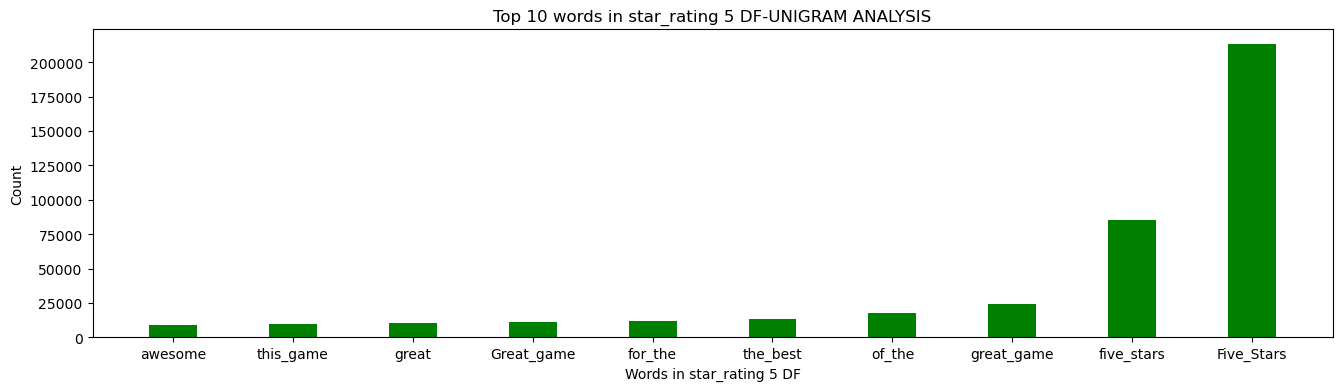

In [136]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_5['index'][-10:], df_rating_5['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 5 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 5 DF-UNIGRAM ANALYSIS")
plt.show()

In [140]:
df_rating_4 = generate_N_grams_df(df = data_test, column_y = "star_rating", value_y = 4, 
                    column_x = "review_headline", n_grams = 2, 
                    dict_result = rating_4)

In [141]:
df_rating_4.tail(10)

index  # words
422168  Great_Game     4868
422169        is_a     4884
422170   Good_game     5120
422171    game_for     5228
422172   good_game     5418
422173     but_not     6842
422174  Great_game     7456
422175      of_the     8608
422176     for_the    12502
422177  Four_Stars    63422

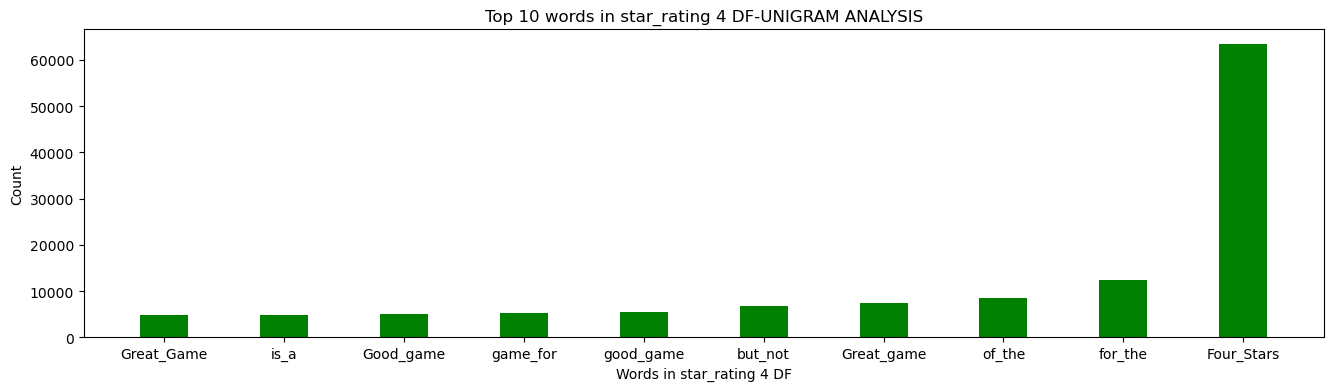

In [142]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_4['index'][-10:], df_rating_4['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 4 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 4 DF-UNIGRAM ANALYSIS")
plt.show()

In [143]:
df_rating_3 = generate_N_grams_df(df = df_train, column_y = "star_rating", value_y = 3, 
                    column_x = "review_headline", n_grams = 2, 
                    dict_result = rating_3)

In [144]:
df_rating_3.tail(10)

index  # words
112803                    617
112804           meh      618
112805          good      629
112806  could_better      669
112807      fun_game      844
112808          okay     1066
112809    great_game     1286
112810     good_game     1816
112811            ok     1866
112812   three_stars     8216

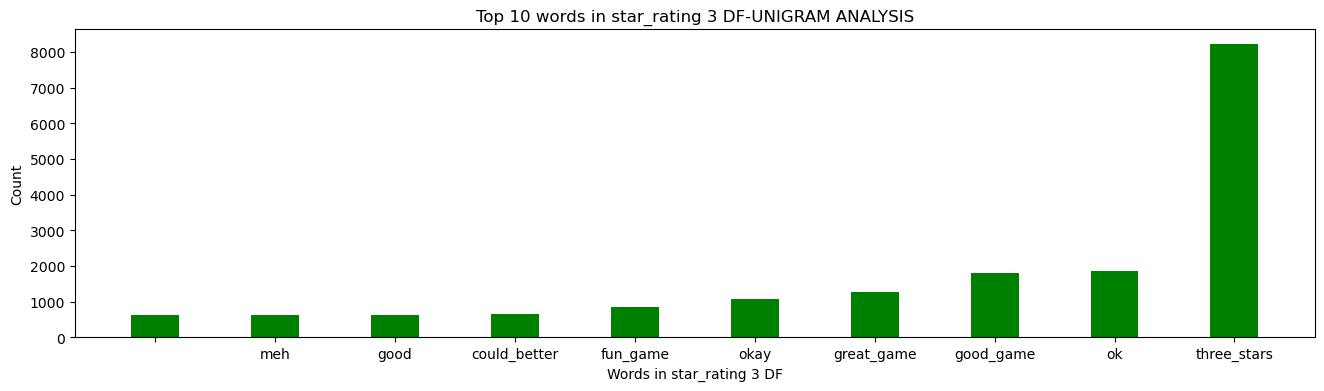

In [145]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_3['index'][-10:], df_rating_3['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 3 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 3 DF-UNIGRAM ANALYSIS")
plt.show()

In [146]:
df_rating_2 = generate_N_grams_df(df = df_train, column_y = "star_rating", value_y = 2, 
                    column_x = "review_headline", n_grams = 2, 
                    dict_result = rating_2)

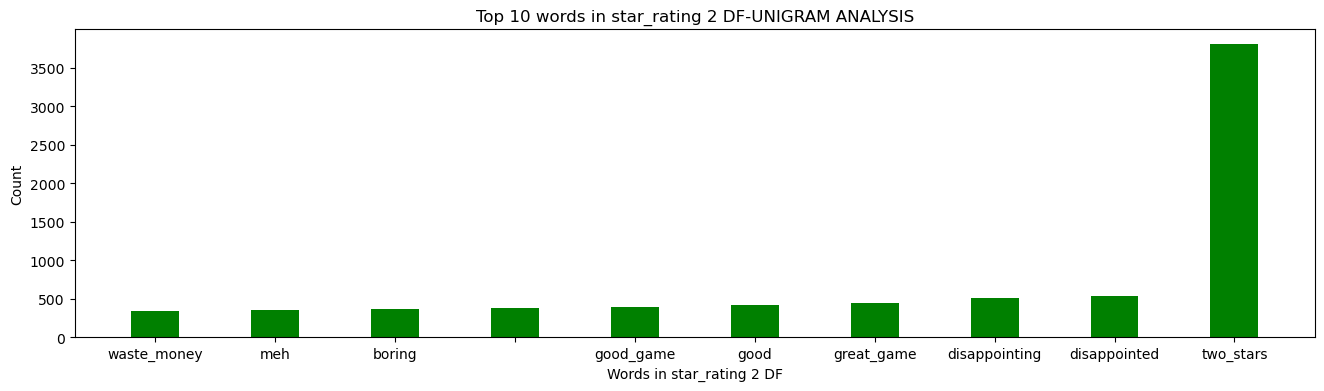

In [147]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_2['index'][-10:], df_rating_2['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 2 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 2 DF-UNIGRAM ANALYSIS")
plt.show()

In [148]:
df_rating_1 = generate_N_grams_df(df = df_train[df_train['star_rating'] == 1], 
                                  column_y = "star_rating", value_y = 1, 
                                  column_x = "review_headline", n_grams = 2, 
                                  dict_result = rating_1)

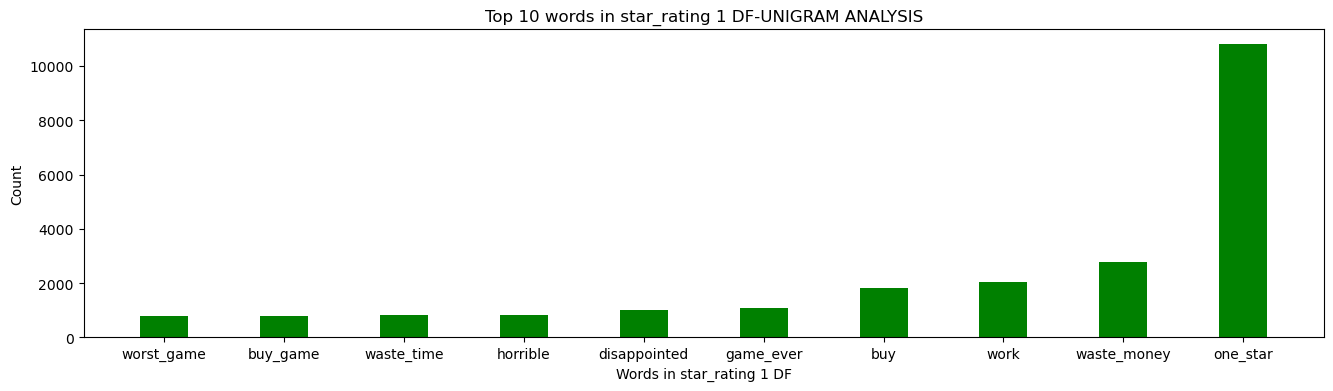

In [149]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_1['index'][-10:], df_rating_1['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 1 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 1 DF-UNIGRAM ANALYSIS")
plt.show()

#### create trigrams

In [153]:
from collections import defaultdict

rating_5 = defaultdict(int)
rating_4 = defaultdict(int)
rating_3 = defaultdict(int)
rating_2 = defaultdict(int)
rating_1 = defaultdict(int)

In [154]:
df_rating_5 = generate_N_grams_df(df = data_test, column_y = "star_rating", value_y = 5, 
                    column_x = "review_headline", n_grams = 3, 
                    dict_result = rating_5)

In [155]:
df_rating_4 = generate_N_grams_df(df = data_test, column_y = "star_rating", value_y = 4, 
                    column_x = "review_headline", n_grams = 3, 
                    dict_result = rating_4)

In [156]:
df_rating_3 = generate_N_grams_df(df = data_test, column_y = "star_rating", value_y = 3, 
                    column_x = "review_headline_wo_punctuations", n_grams = 3, 
                    dict_result = rating_3)

In [157]:
df_rating_2 = generate_N_grams_df(df = data_test, column_y = "star_rating", value_y = 2, 
                    column_x = "review_headline_wo_punctuations", n_grams = 3, 
                    dict_result = rating_2)

In [158]:
df_rating_1 = generate_N_grams_df(df = data_test, column_y = "star_rating", value_y = 1, 
                    column_x = "review_headline_wo_punctuations", n_grams = 3, 
                    dict_result = rating_1)

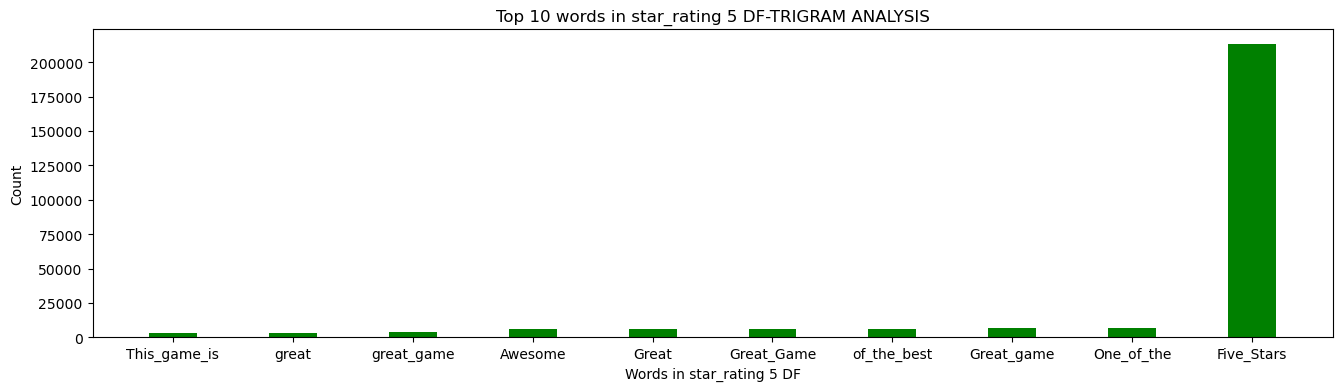

In [159]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_5['index'][-10:], df_rating_5['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 5 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 5 DF-TRIGRAM ANALYSIS")
plt.show()

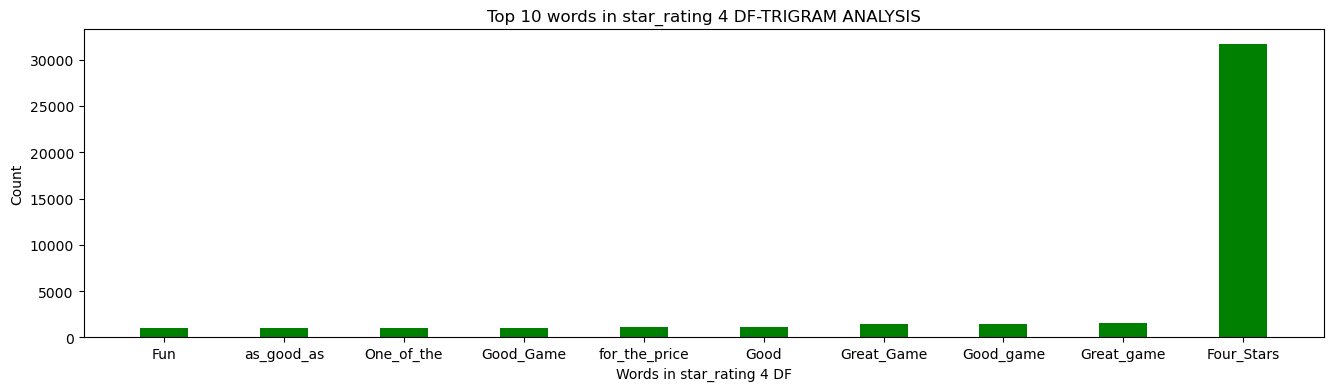

In [160]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_4['index'][-10:], df_rating_4['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 4 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 4 DF-TRIGRAM ANALYSIS")
plt.show()

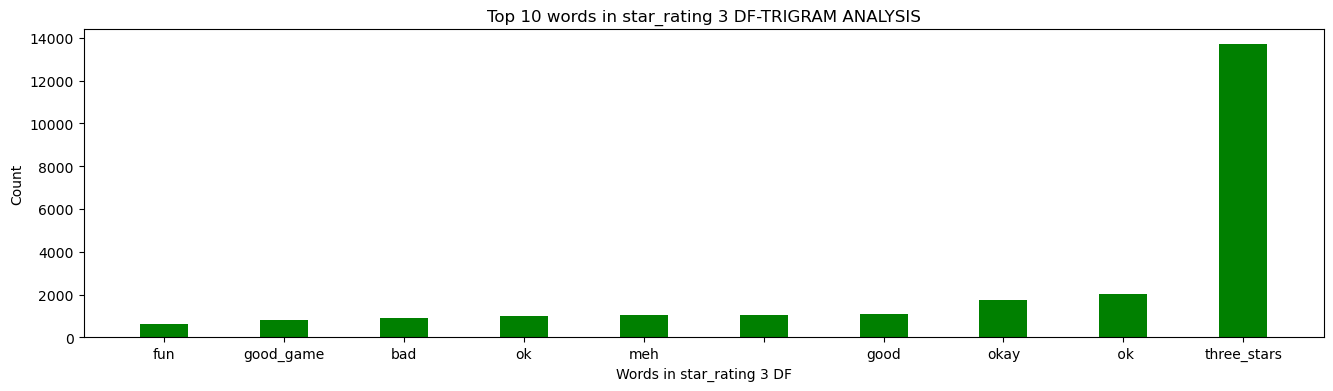

In [161]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_3['index'][-10:], df_rating_3['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 3 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 3 DF-TRIGRAM ANALYSIS")
plt.show()

In [171]:
df_rating_3[(df_rating_3['index'].str.strip() == '') == True]

index  # words
203061            251
203083           1050

In [172]:
df_rating_3 = df_rating_3[(df_rating_3['index'].str.strip() == '') == False]

In [173]:
df_rating_3.tail(10)

index  # words
203077   good_great      517
203078          fun      607
203079    good_game      797
203080          bad      892
203081           ok      996
203082          meh     1033
203084         good     1078
203085         okay     1760
203086           ok     2023
203087  three_stars    13701

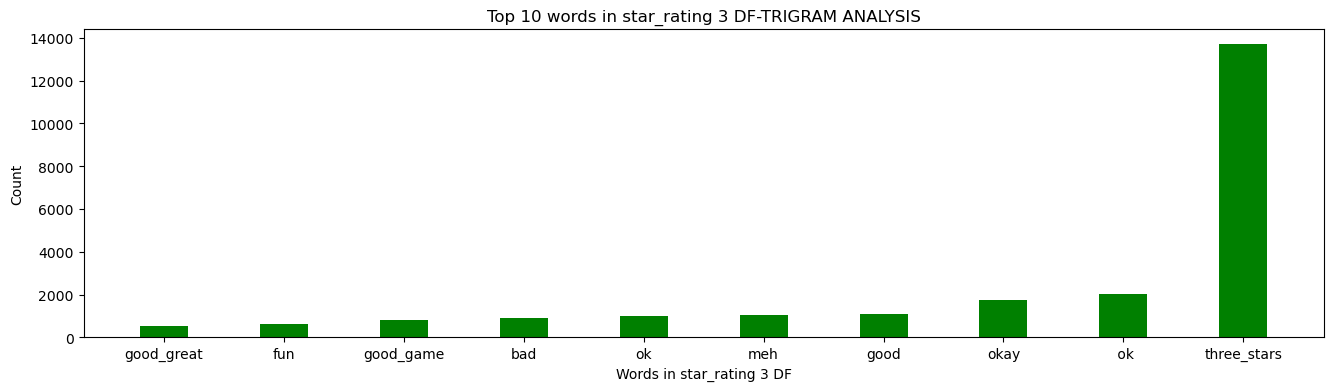

In [175]:
# in the top 10 contains empty space -- > drop it (need to modify the n_gram function)
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_3['index'][-10:], df_rating_3['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 3 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 3 DF-TRIGRAM ANALYSIS")
plt.show()

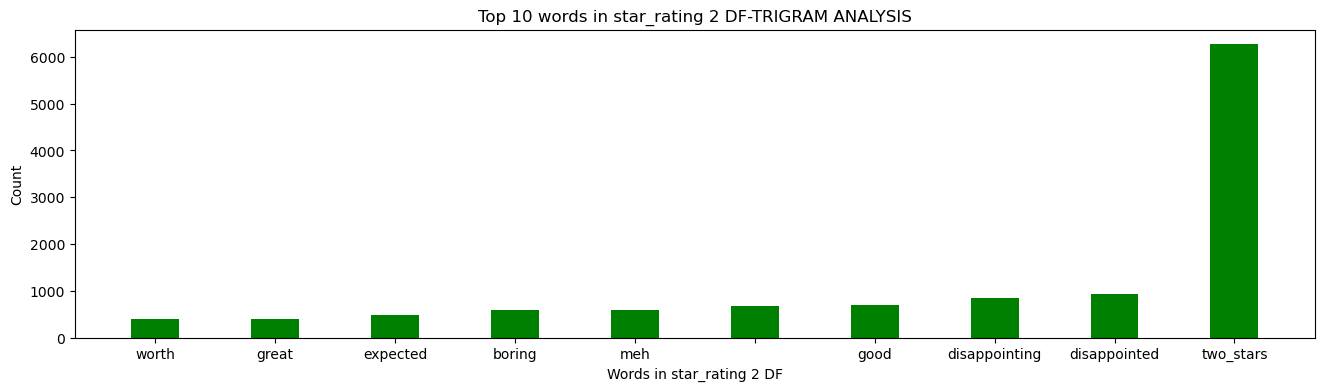

In [162]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_2['index'][-10:], df_rating_2['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 2 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 2 DF-TRIGRAM ANALYSIS")
plt.show()

In [177]:
df_rating_2 = df_rating_2[(df_rating_2['index'].str.strip() == '') == False]
df_rating_2.tail(10)

index  # words
125482    waste_money      375
125483          worth      403
125484          great      405
125485       expected      488
125486         boring      580
125487            meh      587
125489           good      700
125490  disappointing      856
125491   disappointed      931
125492      two_stars     6267

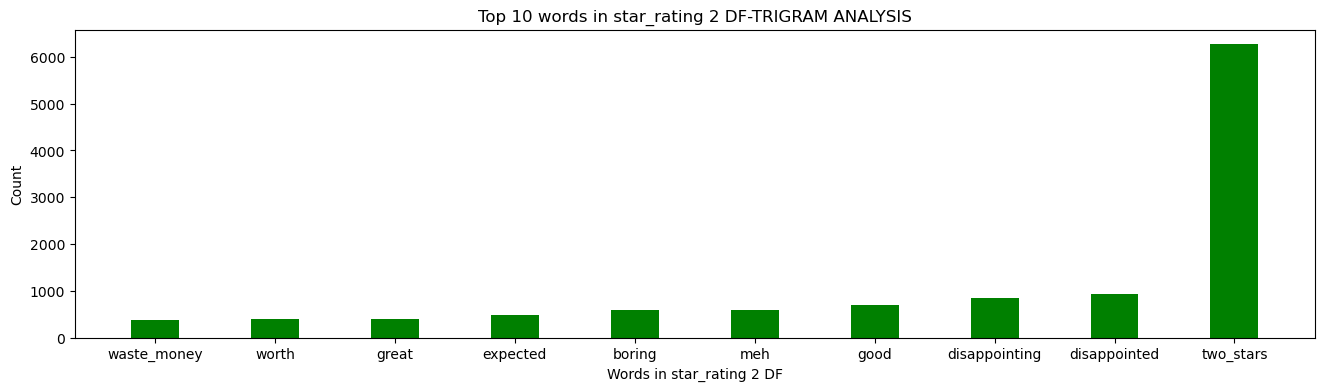

In [178]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_2['index'][-10:], df_rating_2['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 2 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 2 DF-TRIGRAM ANALYSIS")
plt.show()

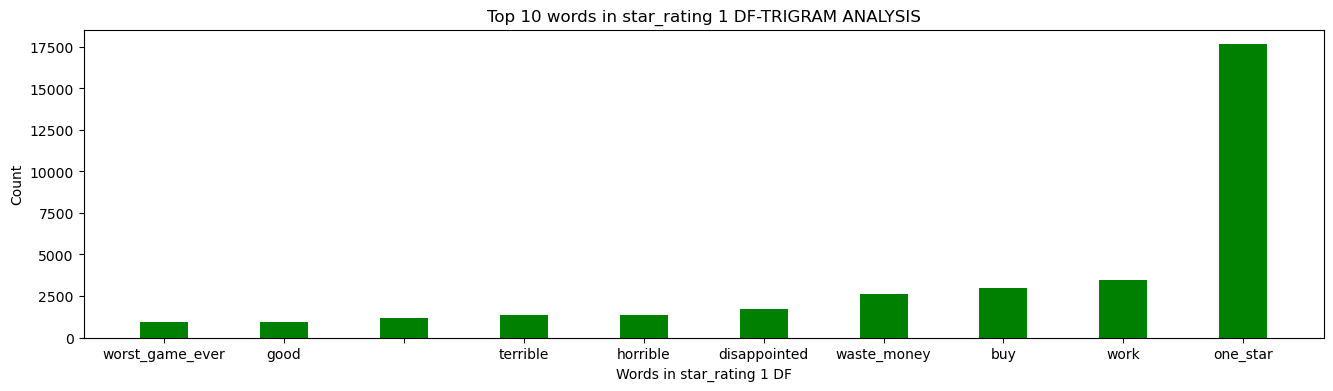

In [164]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_1['index'][-10:], df_rating_1['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 1 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 1 DF-TRIGRAM ANALYSIS")
plt.show()

In [179]:
df_rating_1 = df_rating_1[(df_rating_1['index'].str.strip() == '') == False]
df_rating_1.tail(10)

index  # words
227221              bad      812
227222  worst_game_ever      934
227223             good      951
227225         terrible     1347
227226         horrible     1354
227227     disappointed     1700
227228      waste_money     2647
227229              buy     2983
227230             work     3473
227231         one_star    17652

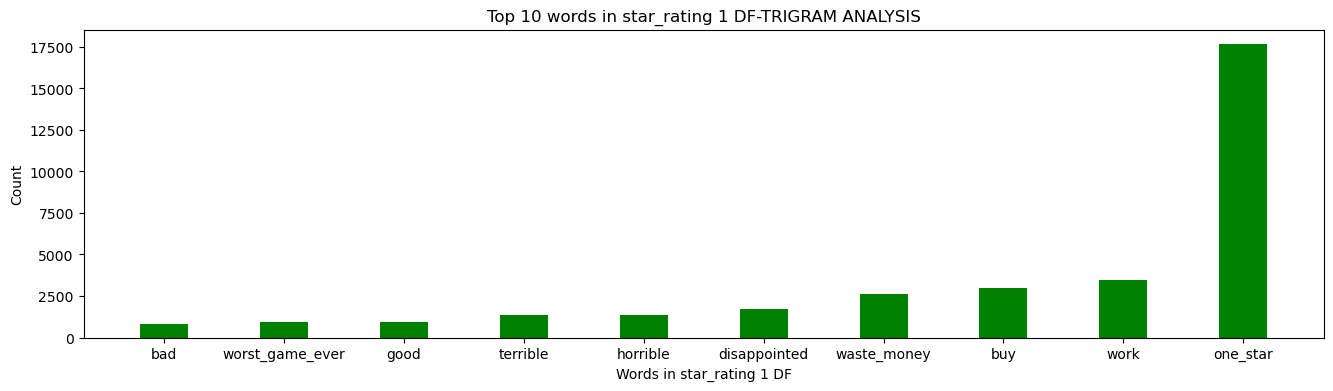

In [180]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_1['index'][-10:], df_rating_1['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 1 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 1 DF-TRIGRAM ANALYSIS")
plt.show()

In [165]:
STOP

NameError: name 'STOP' is not defined

#### To-Do <br>
the result of trigram makes most sense. <br>
As next step, a matrix for further ML-analysis (for example naive bayes [Link](https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a))



In [214]:
from sklearn.feature_extraction.text import CountVectorizer

In [215]:
df_test.head()

review_headline  star_rating  \
0                                   Awesome            5   
1                      Huge Disappointment.            1   
2  one of the best games ive ever played...            5   
3             Murray The Miser Owes Me Cash            5   
4                   Greatest Christmas gift            5   

         review_headline_wo_punctuations  \
0                                Awesome   
1                    Huge Disappointment   
2  one of the best games ive ever played   
3          Murray The Miser Owes Me Cash   
4                Greatest Christmas gift   

                              review_headline_ngrams  
0                                            Awesome  
1                                Huge_Disappointment  
2  one_of_the of_the_best the_best_games best_gam...  
3  Murray_The_Miser The_Miser_Owes Miser_Owes_Me ...  
4                            Greatest_Christmas_gift

In [216]:
df_test['review_headline_ngrams'] = df_test['review_headline_wo_punctuations'].apply(lambda x: generate_N_grams(x, 3))

In [217]:
df_test.head()

review_headline  star_rating  \
0                                   Awesome            5   
1                      Huge Disappointment.            1   
2  one of the best games ive ever played...            5   
3             Murray The Miser Owes Me Cash            5   
4                   Greatest Christmas gift            5   

         review_headline_wo_punctuations  \
0                                Awesome   
1                    Huge Disappointment   
2  one of the best games ive ever played   
3          Murray The Miser Owes Me Cash   
4                Greatest Christmas gift   

                              review_headline_ngrams  
0                                            Awesome  
1                                Huge_Disappointment  
2  one_of_the of_the_best the_best_games best_gam...  
3  Murray_The_Miser The_Miser_Owes Miser_Owes_Me ...  
4                            Greatest_Christmas_gift

In [218]:
df_test_final = df_test[['star_rating', 'review_headline_ngrams']]

In [219]:
corpus = df_test_final.review_headline_ngrams.values.tolist()
corpus[0:5]

['Awesome',
 'Huge_Disappointment',
 'one_of_the of_the_best the_best_games best_games_ive games_ive_ever ive_ever_played',
 'Murray_The_Miser The_Miser_Owes Miser_Owes_Me Owes_Me_Cash',
 'Greatest_Christmas_gift']

In [208]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names())

['a_a_really', 'a_aaa_title', 'a_ac_beta', 'a_actual_game', 'a_actual_owner', 'a_add_on', 'a_addicting_game', 'a_adequate_substitute', 'a_allright_game', 'a_amazon_packing', 'a_and_year', 'a_arcade_game', 'a_av_television', 'a_avid_strategy', 'a_awesome_case', 'a_awesome_deal', 'a_awesome_game', 'a_awesome_job', 'a_awsome_game', 'a_baby_and', 'a_baby_this', 'a_back_seat', 'a_backgammon_review', 'a_bad_attitude', 'a_bad_bargain', 'a_bad_batch', 'a_bad_budget', 'a_bad_choice', 'a_bad_day', 'a_bad_deal', 'a_bad_ending', 'a_bad_expantion', 'a_bad_experience', 'a_bad_game', 'a_bad_investment', 'a_bad_item', 'a_bad_little', 'a_bad_name', 'a_bad_port', 'a_bad_prcie', 'a_bad_price', 'a_bad_product', 'a_bad_purchase', 'a_bad_rap', 'a_bad_rating', 'a_bad_replacement', 'a_bad_rpg', 'a_bad_rts', 'a_bad_season', 'a_bad_series', 'a_bad_silicone', 'a_bad_single', 'a_bad_spill', 'a_bad_spyro', 'a_bad_start', 'a_bad_story', 'a_bad_strategic', 'a_bad_thing', 'a_bad_unit', 'a_bad_version', 'a_bad_way', '

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [221]:
len(vectorizer.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


130258

In [229]:
# define functions for bigrams and trigrams analysis
def generate_N_grams_df_all(df, column_x, n_grams, dict_result):
    for text in df[column_x]:
        ngram = generate_N_grams(text, n_grams)
        if len(ngram) == 1 and ngram[0] == "": # skip empty string
            pass
        if len(generate_N_grams(text, n_grams)) < n_grams:
            dict_result[text]+=1
        else:
            for word in generate_N_grams(text, n_grams).split(" "):
                dict_result[word]+=1
    
    df_result = pd.DataFrame.from_dict(dict_result, orient = 'index')
    df_result = df_result.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
    
    return df_result 

In [231]:
dict_result_all = defaultdict(int)
df_result_all = generate_N_grams_df_all(df = df_test, column_x = "review_headline_wo_punctuations", n_grams = 3, dict_result = dict_result_all)

In [238]:
df_result_all.describe()

# words
count  143594.000000
mean        1.466148
std        22.937704
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      8400.000000

In [237]:
df_result_all[df_result_all['# words']<=5].count()

index      141269
# words    141269
dtype: int64

In [239]:
# drop the tokens which appear fewer than &including 5 times
df_result_all = df_result_all[df_result_all['# words'] > 5]

In [240]:
df_result_all.describe()

# words
count  2325.000000
mean     21.176774
std     179.156467
min       6.000000
25%       7.000000
50%       9.000000
75%      15.000000
max    8400.000000

In [242]:
df_result_all.head()

index  # words
141269   Awsome_game        6
141270  game_doesn_t        6
141271    If_I_could        6
141272      on_Wii_U        6
141273  quite_what_I        6

In [257]:
feature_filter = df_result_all['index'].values.tolist()

In [258]:
vectorizer = CountVectorizer(vocabulary = feature_filter)
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names()[0:5])
print(len(vectorizer.get_feature_names()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1322: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


['Awsome_game', 'game_doesn_t', 'If_I_could', 'on_Wii_U', 'quite_what_I']
2325


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [253]:
# problem > too many features --> not enough memory --> drop featurew with number of appearance in the db fewer than 5 times
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [269]:
X.shape

(76995, 2325)

In [270]:
df_test_final.shape

(76995, 2)

In [261]:
# # test matrix
# for row in X.toarray():
#     print(sum(row))

1
0
3
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
1
3
0
0
0
0
0
0
0
1
0
0
1
1
0
1
0
1
0
0
0
0
0
0
0
2
0
1
0
0
1
0
0
1
0
0
0
1
1
0
1
0
1
1
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
2
1
2
0
3
4
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
1
3
0
0
0
1
0
1
0
0
4
0
0
0
0
1
0
0
0
0
2
1
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
2
0
2
0
0
2
4
0
1
0
0
1
1
1
1
0
0
0
1
0
3
2
0
1
2
0
0
1
1
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
0
0
4
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
2
0
0
0
1
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
1
0
2
0
0
0
1
1
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
2
2
0
0
0
4
1
0
1
0
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
1
3
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
0
1
1
0
8
0
1
0
0
0
0
0
1
0
1
0
0
0
0
1
2
0
0
0
1
1
0
4
0
1
0
0
0
0
1
0
1
1
0
0
0
3
0
0
1
0
1
2
0
0
1
0
0
0
0
0
0
0
0
0
0
2
1
1
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
2
0
0
0
2


1
1
1
0
1
1
1
1
0
0
0
1
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
2
0
2
0
1
0
1
0
0
1
1
1
0
2
0
0
1
0
0
0
1
0
1
0
0
3
0
1
0
1
1
0
3
0
2
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
2
1
0
0
0
0
1
0
3
1
0
4
1
0
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
3
0
0
3
0
1
0
1
0
3
0
0
0
0
0
0
1
0
1
5
0
0
3
0
0
2
5
1
0
1
0
1
3
0
0
2
0
0
0
0
0
0
1
0
0
0
2
0
0
0
0
1
0
0
3
0
0
1
1
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
2
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
2
2
2
0
0
0
1
0
0
1
0
0
1
0
0
3
0
0
2
0
0
0
0
3
0
0
0
1
1
0
3
0
0
1
0
0
0
0
1
0
1
1
0
0
1
0
1
1
2
0
1
0
2
0
1
1
0
0
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
3
0
4
0
0
0
1
0
0
0
1
1
1
1
0
1
1
1
2
0
0
1
0
0
2
0
0
2
0
0
1
0
1
0
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
1
0
4
0
0
0
3
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
0
0
0
1
0
0
2
0
2
0
0
0
0
0
0
0
0
3
0
0
0
0
2
0
1
0
5
1
0
0
0
0
0
0
0
1
0
0
1
3
1
3
1
0
1
0
0
6
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
1
0
0
2
0
2
0
0
0
0
1
1
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0


KeyboardInterrupt: 

In [265]:
# count = 0
# for i in X.toarray()[0]:
#     count+=1
#     if i != 0:
#         print(count)
#         break

2303


In [267]:
# feature_filter[2302]

'awesome'

##### train model

In [273]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
X = df_test_final

In [ ]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model using the training data
model.fit(X, df_test_final.star_rating)

In [276]:
# test
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
text_categories = data.target_names

In [ ]:
data

## Reference
1. https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/ <br>
2. https://www.kaggle.com/code/rtatman/tutorial-getting-n-grams/notebook <br>
3. https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a